## EXPLORATORY DATA ANALYSIS
Overview of the data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd

In [ ]:
skewness = df_adj.skew(numeric_only = True)
print(skewness)

cholesterol    1.504091
gluc           2.314737
smoke          3.002525
alco           4.084369
active        -1.521795
cardio        -0.112742
age_years      0.010402
bmi            0.565997
bp_category   -1.002719
dtype: float64


- Cholesterol, Glucose, Smoking and Alcohol has a significantly high skewness to the right.
- Age does not seem to be skewed as the value is very close to zero
- bmi has a moderate skewness to the right
-activeness has a significantly high skewness to the left
- cardio seems to have a slight skewness to the left but close to the middle.
- bp_category seems to have a pretty high skewness to the left

In [ ]:
def uniNum(st, df_adj):
  f, axes = plt.subplots(1, 2, figsize=(20, 5))
  sb.histplot(data = df_adj[st], ax = axes[0])
  sb.violinplot(data = df_adj[st], orient = 'h', ax = axes[1])
def uniBinary(st, df_adj):
    category_order = [0, 1]
    category_labels = ['No', 'Yes']
    color_palette = 'hls'
    sb.catplot(x=st, hue = st, data=df_adj, kind="count", order=category_order, palette = color_palette)
    plt.legend(title=st, labels=category_labels)
    plt.title(f'Count of {st}')
    plt.show()
def uniBinaryMul(st, df_adj):
    category_order = [0, 1, 2]
    category_labels = ['Normal', 'Above Normal', 'Well Above Normal']
    color_palette = sb.color_palette("husl", n_colors=len(category_labels))
    sb.catplot(x=st, hue=st, data=df_adj, kind="count", order=category_order, palette=color_palette)
    plt.legend(title=st, labels=category_labels)
    plt.title(f'Count of {st}')
    plt.show()
def uniAge(st, df_adj):
  plt.figure(figsize=(10, 6))
  sb.countplot(x=st, hue = st, data=df_adj, palette='Set2')
  plt.title('Count of Observations in Each Age Category')
  plt.xlabel('Age Category')
  plt.ylabel('Count')
  plt.xticks(rotation=45)
  plt.show()
def uniBinaryMul1(st, df_adj):
    category_order = [0, 1, 2, 3]
    category_labels = ['Normal', 'Elevated', 'Stage 1', 'Stage 2']
    color_palette = sb.color_palette("husl", n_colors=len(category_labels))
    sb.catplot(x=st, hue=st, data=df_adj, kind="count", order=category_order, palette=color_palette)
    plt.legend(title=st, labels=category_labels)
    plt.title(f'Count of {st}')
    plt.show()

##Numerical Data Variables

*   BMI





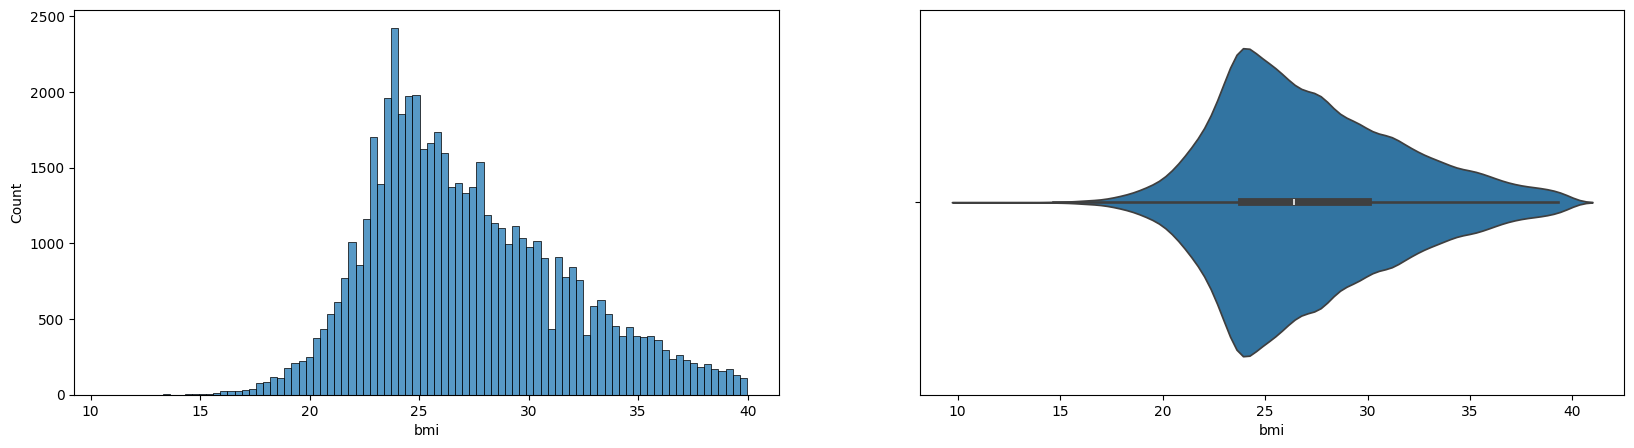

In [ ]:
uniNum('bmi', df_adj)

The graphs above show that the dataset we are using has a slight positive skew, with most of the data points for BMI found between the mid-20s and 30s. This indicates that most of the participants are somewhat healthy as the BMI range for healthy adults is 18.5 to 24.9 while the BMI range for overweight adults is 25.0 to 29.9. It is important to note that the interpretation of BMI does not change with age. Hence, even with the age of the participants ranging from 40 to 70 years old, the same measurements used for BMI to determine health stay the same.

#####https://www.betterhealth.vic.gov.au/tools/body-mass-index-calculator-for-adult
#####https://www.buzzrx.com/blog/target-bmi-for-every-age


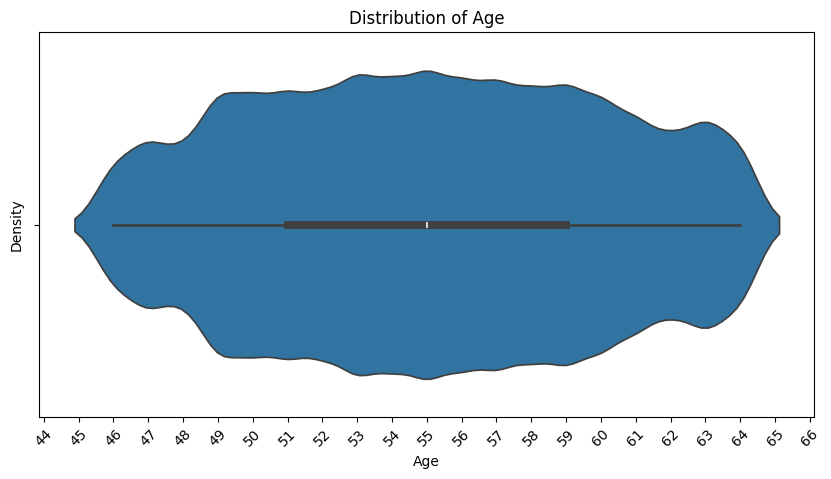

In [ ]:
# Do not touch this
plt.figure(figsize=(10, 5))
sb.violinplot(data=df_adj, x = 'age_years', fill = True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xticks(ticks=range(44, 67, 1), rotation=45)
plt.show()

The graph above shows that the majority of the participants are middle-aged, with the median of the sample size being 55 years old. This has implications in how we view the data as the health conditions for a middle-aged person varies from that of a child or a young adult. The distribution of the participants’ ages is, however, not ideal. The number of participants aged 45 to 49 and 60 to 65 are significantly lower than the number of participants aged 49 to 60. Hence, there is a smaller representation for participants in those age ranges and could introduce bias into our analysis.

# CATEGORICAL VARIABLES
* Cholesterol
* Glucose
* Smoking Habits
* Alcohol
* Active
* Cardio


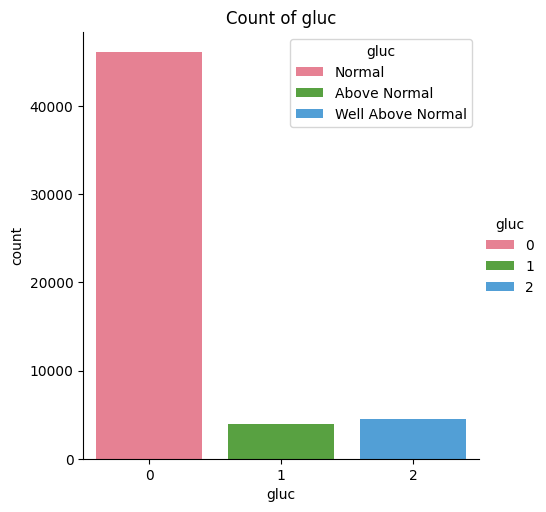

In [ ]:
uniBinaryMul('gluc', df_adj)

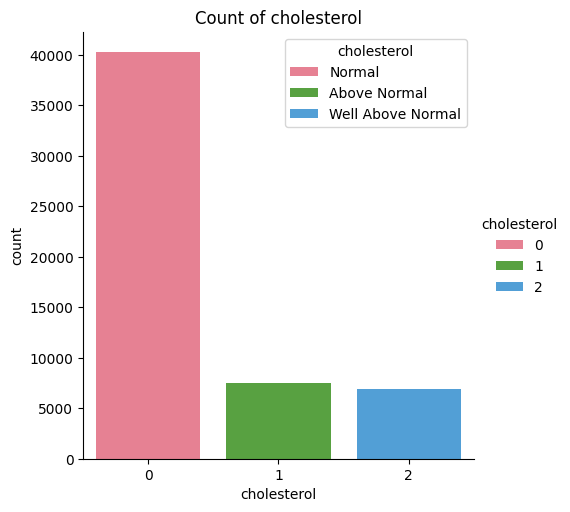

In [ ]:
uniBinaryMul('cholesterol', df_adj)

As seen in the graphs for smoke, alco, and active, most of the participants participants have normal glucose and cholesterol levels. This might suggest that most of the participants lead a healthy lifestyle.

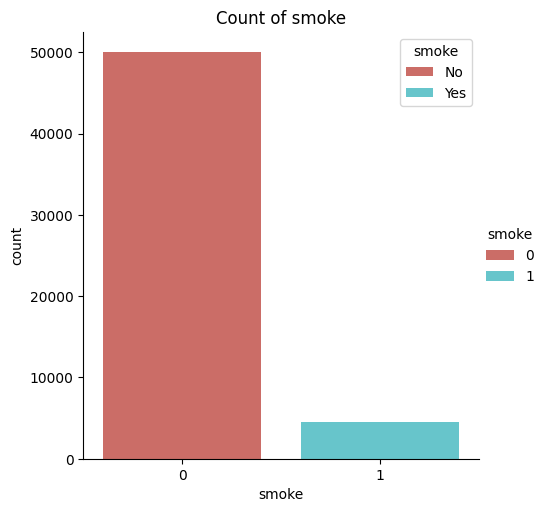

In [ ]:
uniBinary('smoke', df_adj)

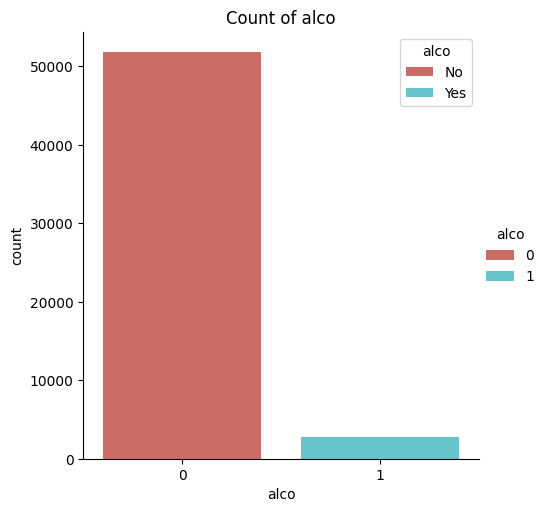

In [ ]:
uniBinary('alco', df_adj)

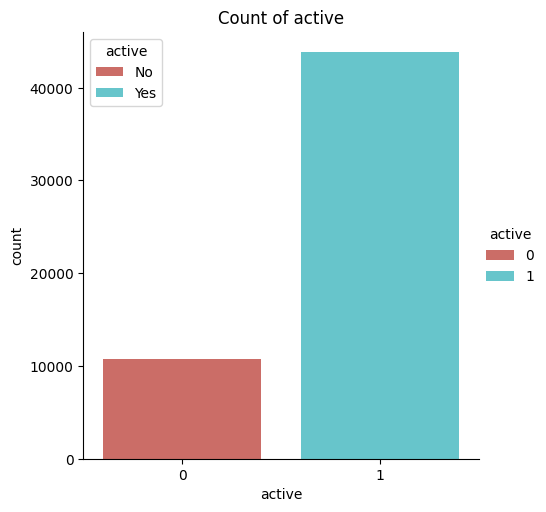

In [ ]:
uniBinary('active', df_adj)

As seen in the graphs for smoke, alco, and active, most of the participants do not smoke or drink heavily and are active. This could mean that they lead a healthy lifestyle but further investigation must be conducted to confirm the correlation between habits and health indicators.

Though it is good that most of the participants do not smoke or drink heavily, it does mean that the distribution of participants is biased towards non-smokers and non-alcoholics, which makes it more difficult to make a clear analysis whether these habits are truly correlated with the health indicators.

It could be the case where the sample is smaller and more prone to bias, resulting in less accurate results. However, considering that the sample size is >10000, we are confident that this is unlikely to be the case.

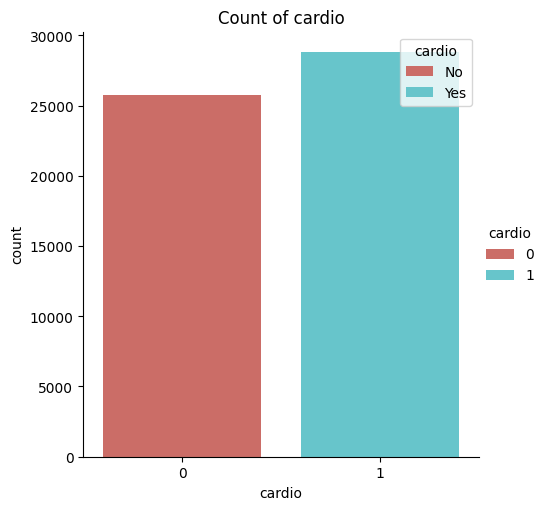

In [ ]:
uniBinary('cardio', df_adj)

  However, the graph for cardio indicates that the difference in the number of participants with or without cardiovascular disease (CVD) is small relative to the sample size. This might suggest that the age group being surveyed might be more susceptible to CVD and further investigation must be conducted to see if the presence of CVD is a reliable health indicator.

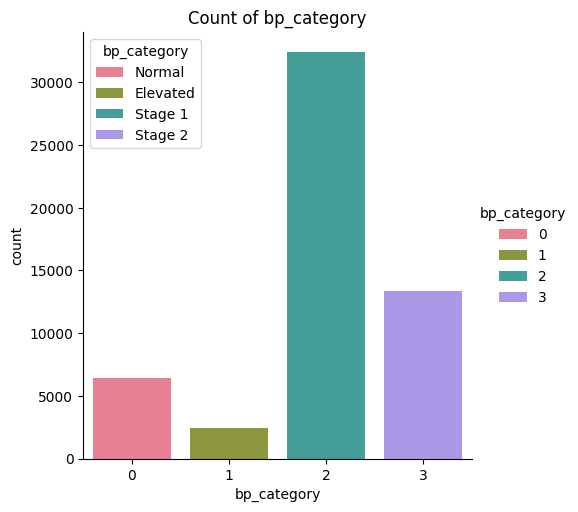

In [ ]:
uniBinaryMul1('bp_category', df_adj)

The graph for bp_category shows that the majority of participants have Hypertension Stage 1. This might mean that a large proportion of the population between 45 and 70 years old has blood pressure issues.

# Bivariate Numerical Exploration

As seen from the correlation matrix, the variables do not have a close correlation with the other variables, whith the closest being gluc and cholesterol at 0.45. Hence, it would make more sense to evaluate each variable by itself as there are existing studies that can show how each variable is related to a person's overall health.



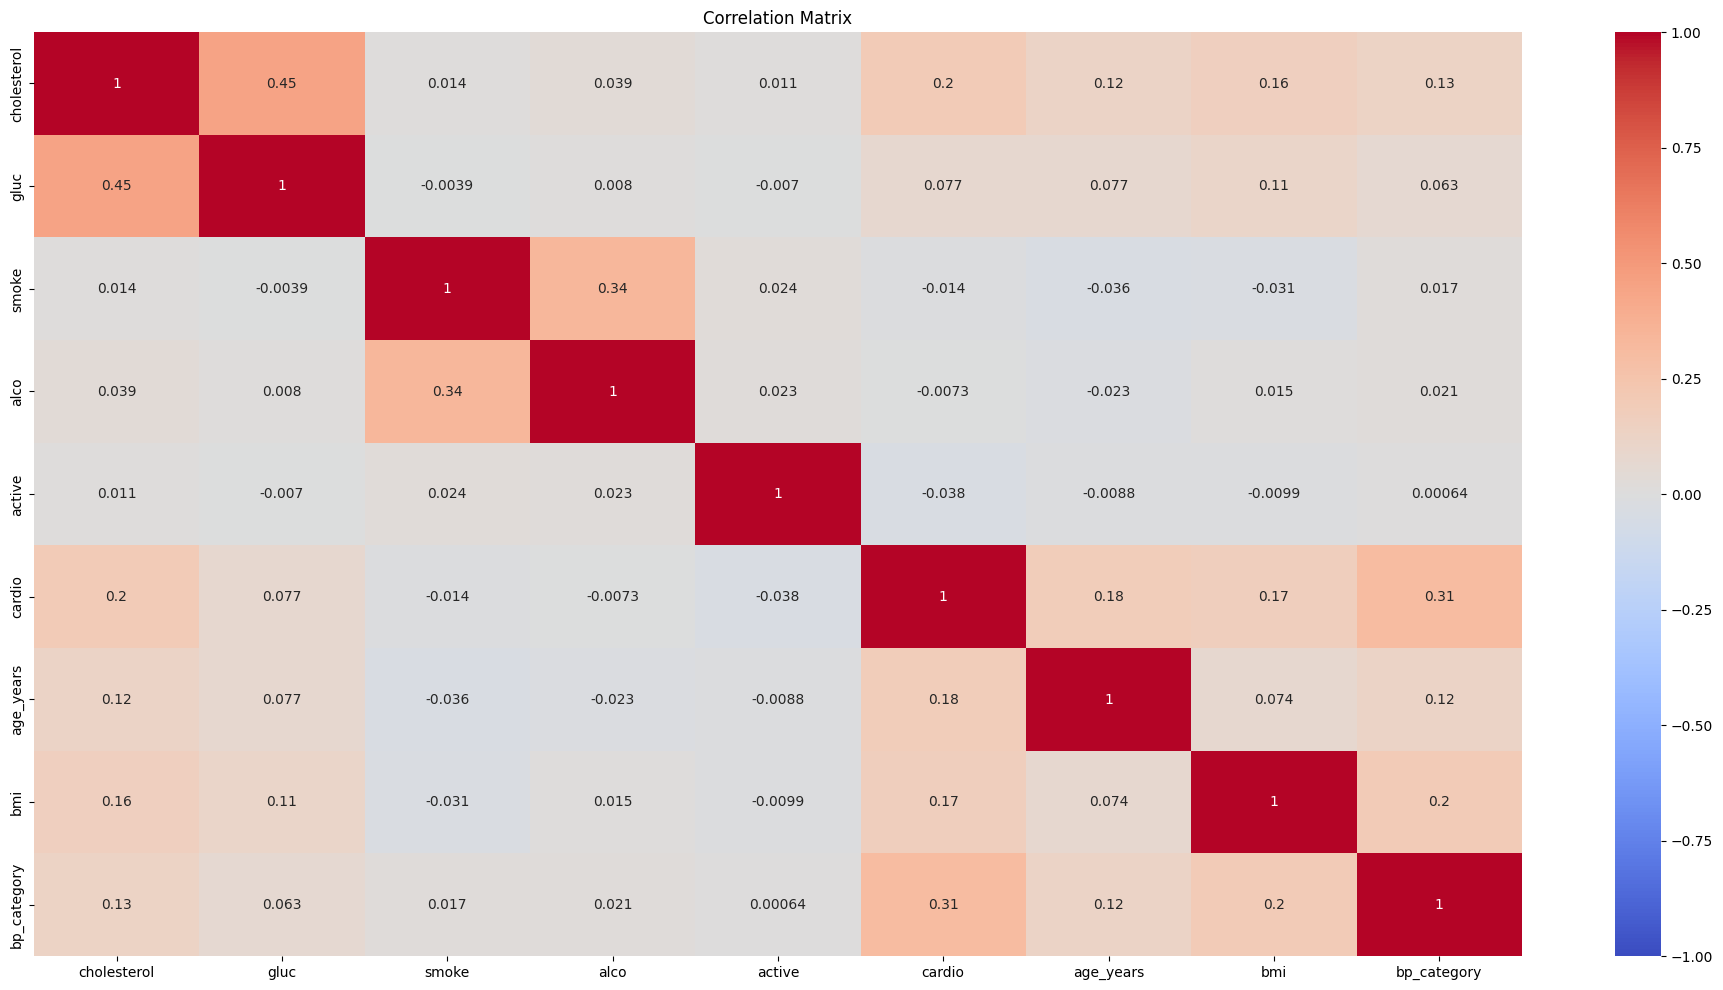

In [ ]:
corr = df_adj.corr(numeric_only = True)
plt.figure(figsize = (24,12))
sb.heatmap(corr, annot = True, cmap = 'coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
def biNum(str, df_adj):
  plt.figure(figsize=(12, 8))
  sb.boxplot(x = 'bp_category',y = str, data = df_adj)
  plt.show()

  plt.figure(figsize=(16, 8))
  unique_categories = df_adj['bp_category'].unique()
  for cat in unique_categories:
        sb.kdeplot(data=df_adj[df_adj['bp_category'] == cat][str], fill=True, label=f'Category {cat}')
  plt.legend(title='bp_category')
  plt.xlabel(str)
  plt.ylabel('Density')
  plt.title(f'KDE PLOT OF {str}')
  plt.show()

  f = plt.figure(figsize=(16, 8))
  sb.violinplot(x = 'bp_category',y = str, data = df_adj)

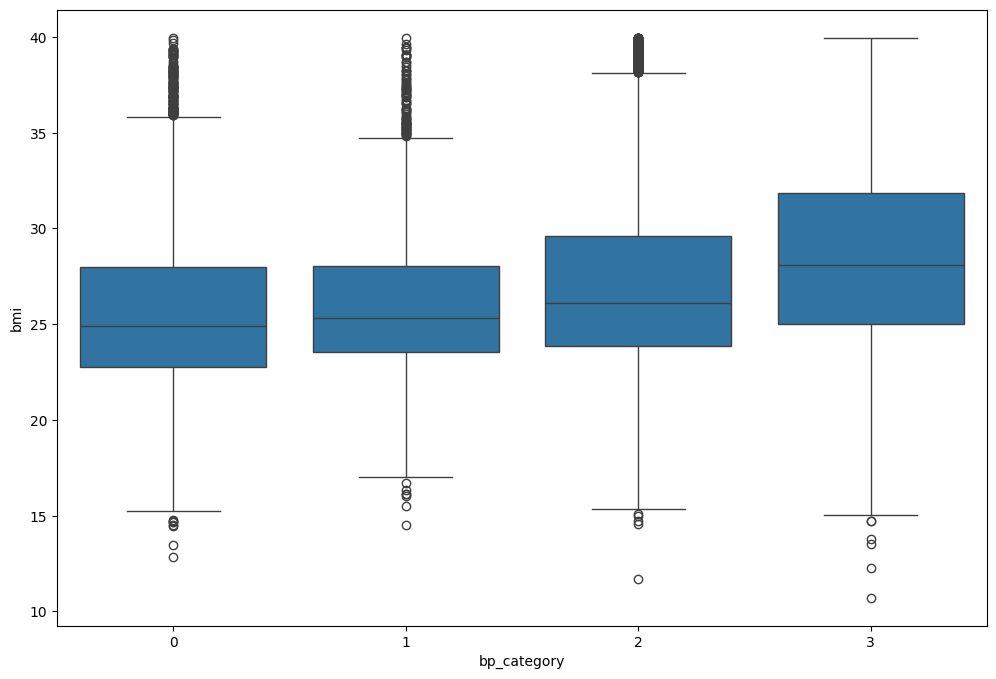

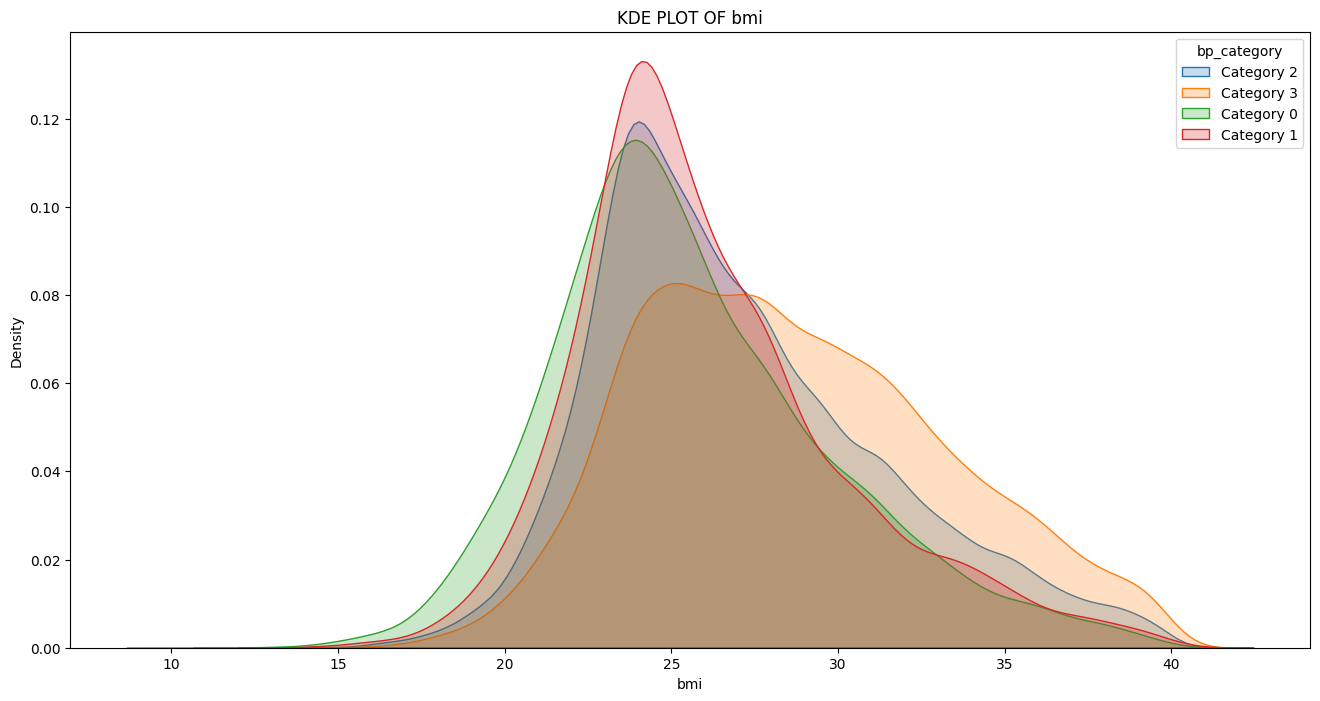

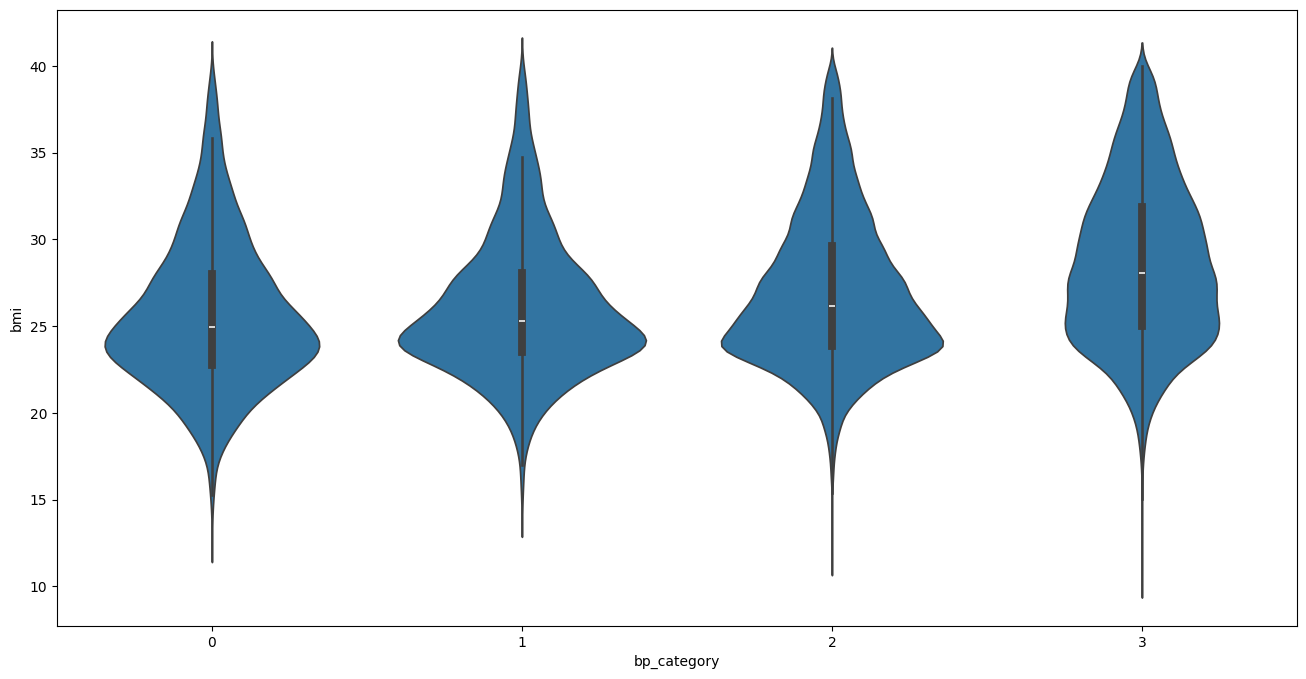

In [ ]:
biNum('bmi', df_adj)

As seen in the graphs above, there is a noticeable difference between the distribution of Category 0, 1 (Normal and Elevated respectively) and  Category 3 (Hypertension Stage 2), and a slight difference between the distribution of the Category 2 (Hypertension stage 1) and the distributions of Category 0,1 (Normal and Elevated respectively).

By analysing the box plots for each category, we observe that the distributions of the Categories 0 and 1 are similar to each other, with most of the participants having a BMI of 23-28. The distribution of Category 2 shows that there is a correlation between participants with Hypertension stage 1 and participants with a higher BMI of 25-30. The distribution of the Category 3 shows that there is a correlation between participants with Hypertension stage 2 and participants with a higher BMI of 27-33. This shows that blood pressure is somewhat correlated to BMI.

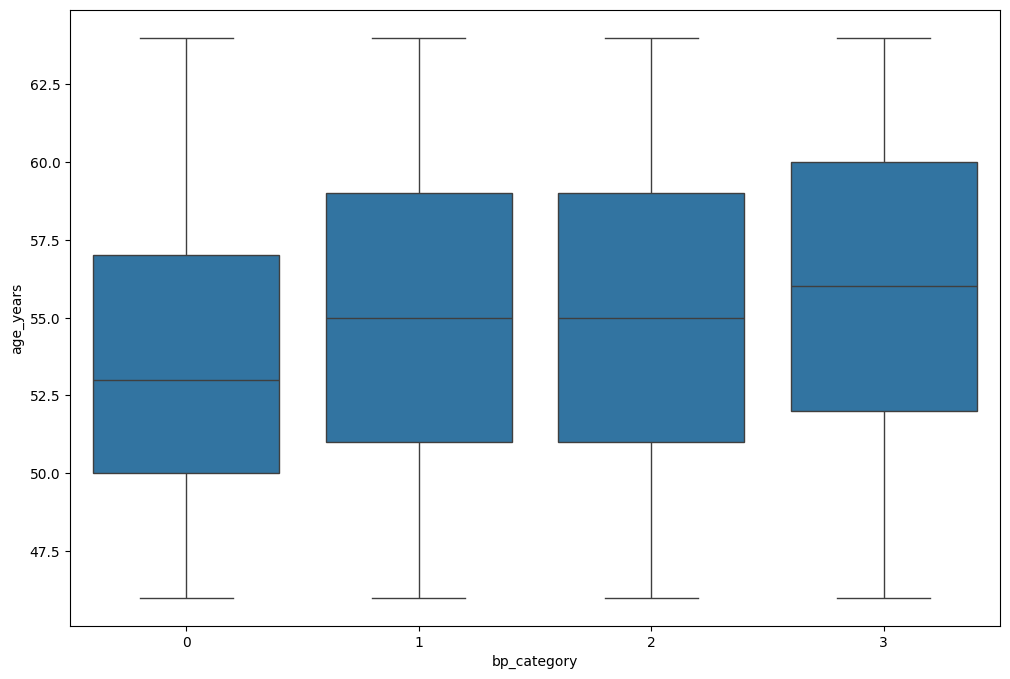

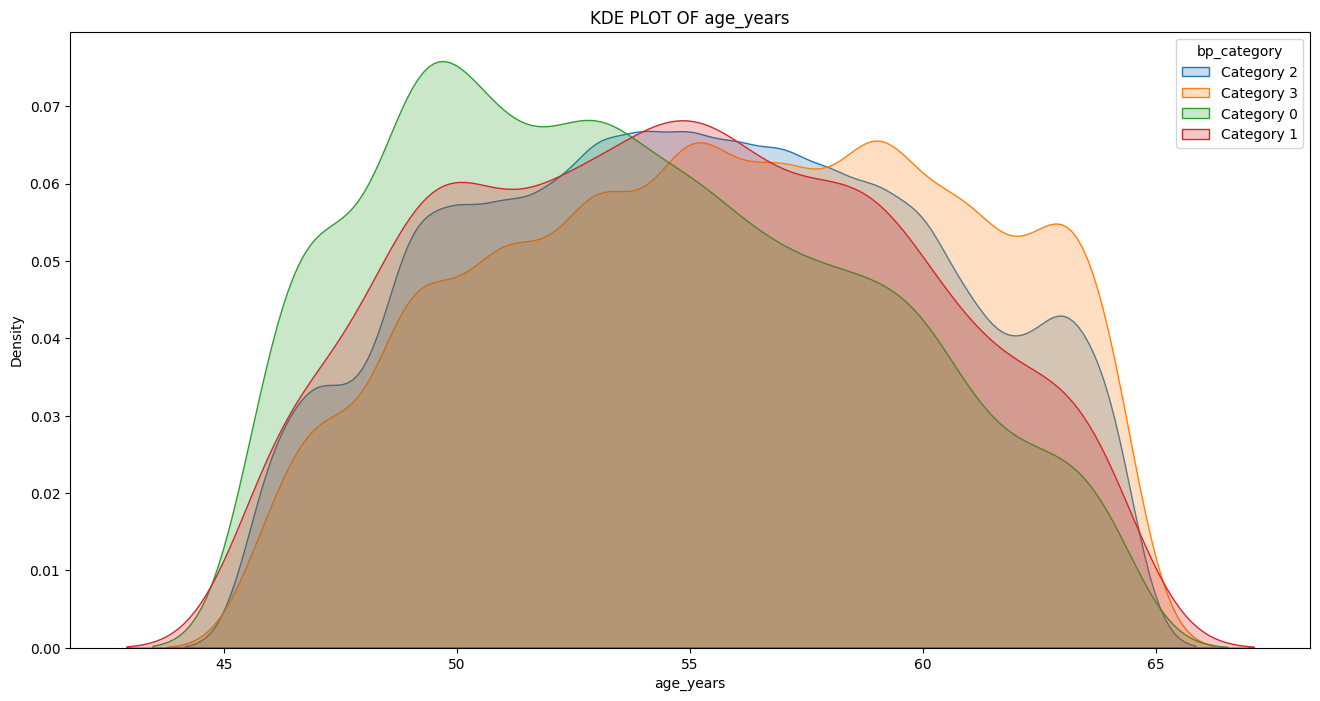

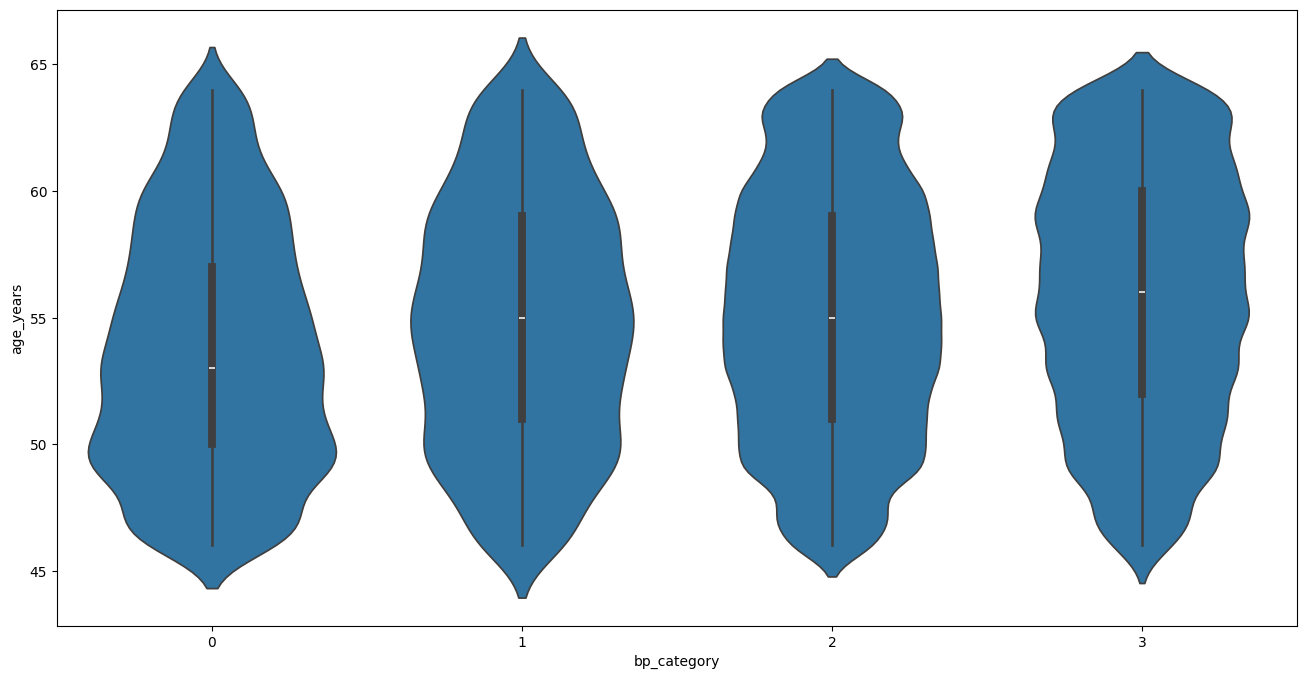

In [ ]:
biNum('age_years', df_adj)

The graphs above show that the age demographics for those with normal blood pressure is significantly lower than that with blood pressure issues. The age demographics of those with elevated blood pressure and Hypertension Stage 1 are similar while that of those with Hypertension Stage 2 is significantly higher. This suggests that there is a correlation between age and blood pressure, where the older the individual, the more likely they will have more severe blood pressure issues.

# Bivariate Categorical Analysis

In [31]:
def prebiCatAnalysis(str, df_adj):
    f = plt.figure(figsize=(16,8))
    category_order = [0, 1]
    category_labels = ['No', 'Yes']
    sb.countplot(y=str, hue='bp_category', data=df_adj, palette='Set2')
    plt.title(f'Comparison of {str} with Hypertension Levels')
    plt.xlabel('count')
    plt.ylabel(f'{str}')
    plt.show()

def biCatAnalysis(str, df_adj):
    unique_categories = df_adj[str].unique()
    n_categories = len(unique_categories)
    fig, axs = plt.subplots(1, n_categories, figsize=(6 * n_categories, 6))

    for i, category in enumerate(unique_categories):
        subset = df_adj[df_adj[str] == category]
        bp_frequencies = subset['bp_category'].value_counts(normalize=True)
        pie_colors = sb.color_palette('pastel')
        axs[i].pie(bp_frequencies, labels=bp_frequencies.index, autopct='%1.1f%%', startangle=140, colors= pie_colors)
        axs[i].set_title(f"{str}: {category}")

    plt.show()

def calculateProb(str, df_adj):
    total_counts = df_adj.groupby(str)['bp_category'].count()
    hypertension_counts = df_adj.groupby([str, 'bp_category']).size()
    prob = (hypertension_counts / total_counts).reset_index(name='probability')
    return prob

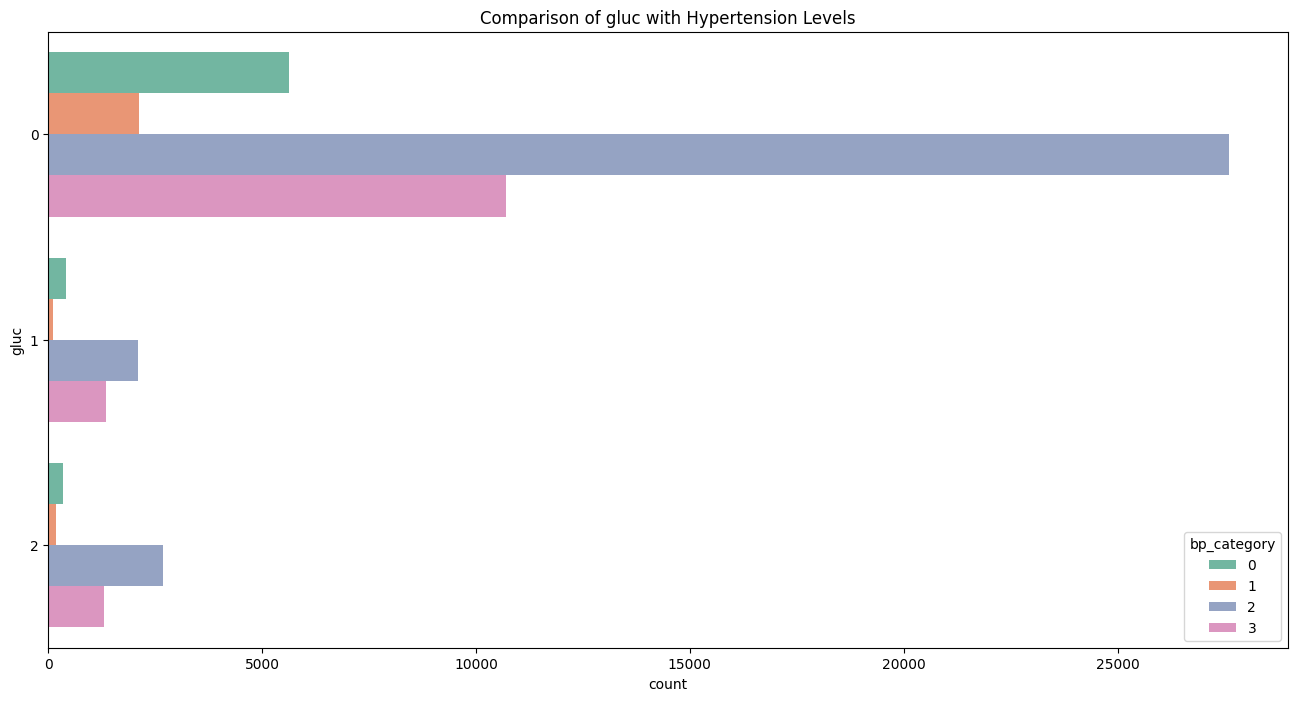

In [32]:
prebiCatAnalysis('gluc', df_adj)

As shown in the graph above, the distribution of participants across the different glucose levels is heavily skewed towards those with normal glucose levels. Hence, we will plot pie charts and calculate probabilities to observe any changes in frequency for bp_catergory across different levels for gluc, cholesterol, smoke, alco, active and cardio.

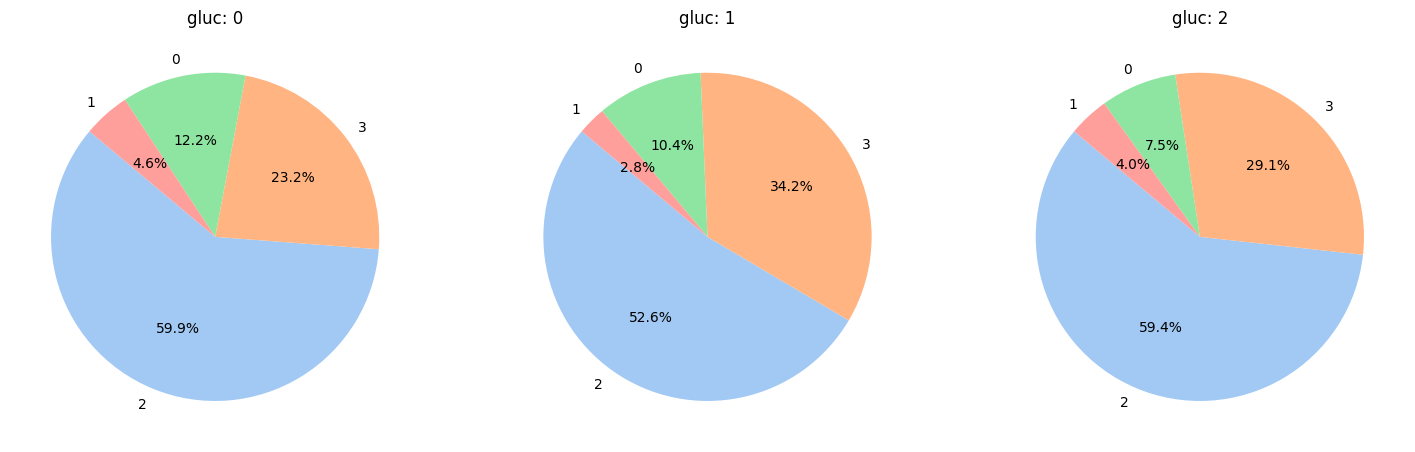

In [33]:
biCatAnalysis('gluc', df_adj)

Legend: gluc:0 = Normal, gluc:1 = Above Normal, gluc:2 = Well Above Normal

From the graphs above, there is no clear correlation between gluc and BP levels. However, we were able to come to a few conclusions:
1. The percentage of Normal decreases as glucose levels increase, from 12.2% to 10.4% to 7.5%. This suggests that participants with Normal BP also have Normal blood glucose.
2. For Elevated, Stage 1 Hypertension and Stage 2 Hypertension, there is no clear correlation between gluc and BP, which indicates that gluc might not be a good predictor for BP. However, some observations can be made, such as the significant increase in percentage of Stage 2 Hypertension increases from Normal(0) to Above Normal(1) and Well Above Normal(2), with 23.2% compared to 34.2% and 29.1% respectively. This might indicate that elevated blood glucose might affect BP but the extent to which it affects BP does not necessarily increase as blood glucose increases.

This somewhat lines up with external studies that state that "high levels of sugar in blood can lead to something called atherosclerosis", which is "when there's a build-up of fatty material inside  blood vessels, narrowing them". This in turn, causes blood pressure to increase, leading to hypertension.

https://www.diabetes.org.uk/guide-to-diabetes/managing-your-diabetes/blood-pressure#:~:text=High%20levels%20of%20sugar%20in,more%20the%20pressure%20builds%20up.

In [ ]:
calculateProb('gluc', df_adj)

,gluc,bp_category,probability
0,0,0,0.122312
1,0,1,0.046217
2,0,2,0.599063
3,0,3,0.232408
4,1,0,0.104313
5,1,1,0.027834
6,1,2,0.526078
7,1,3,0.341775
8,2,0,0.074961
9,2,1,0.039920


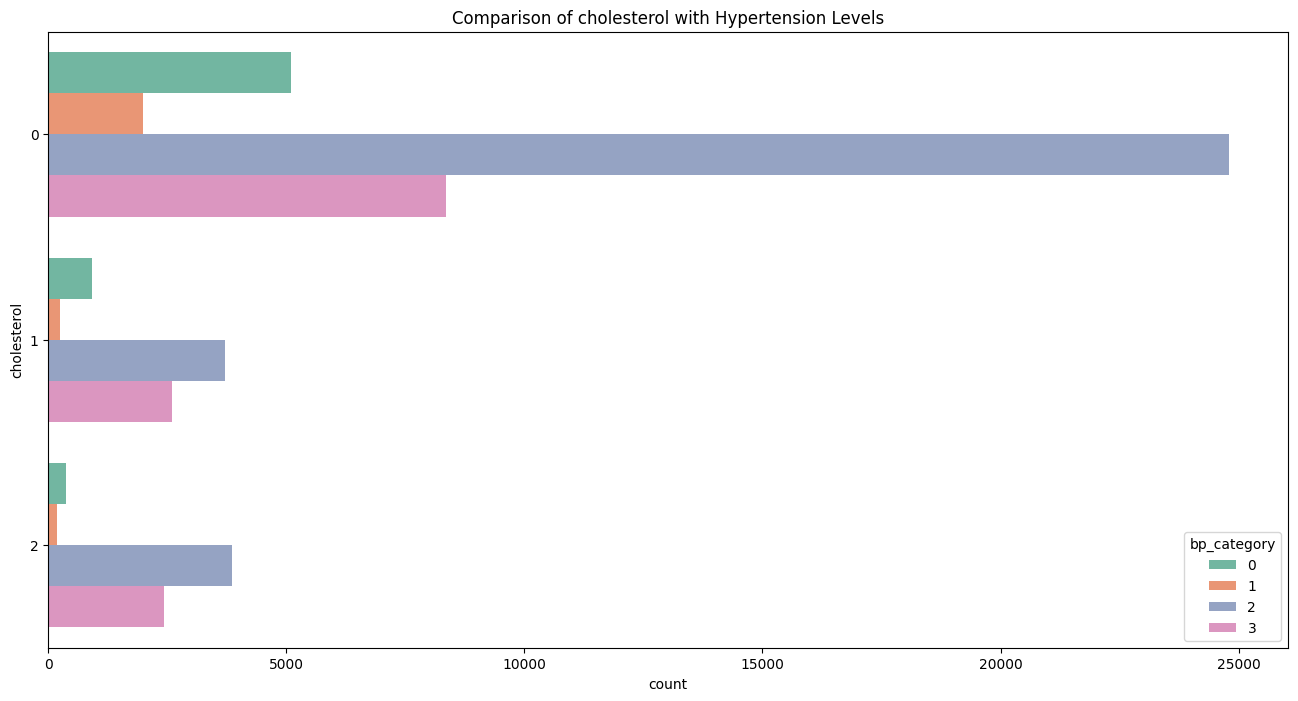

In [21]:
prebiCatAnalysis('cholesterol', df_adj)

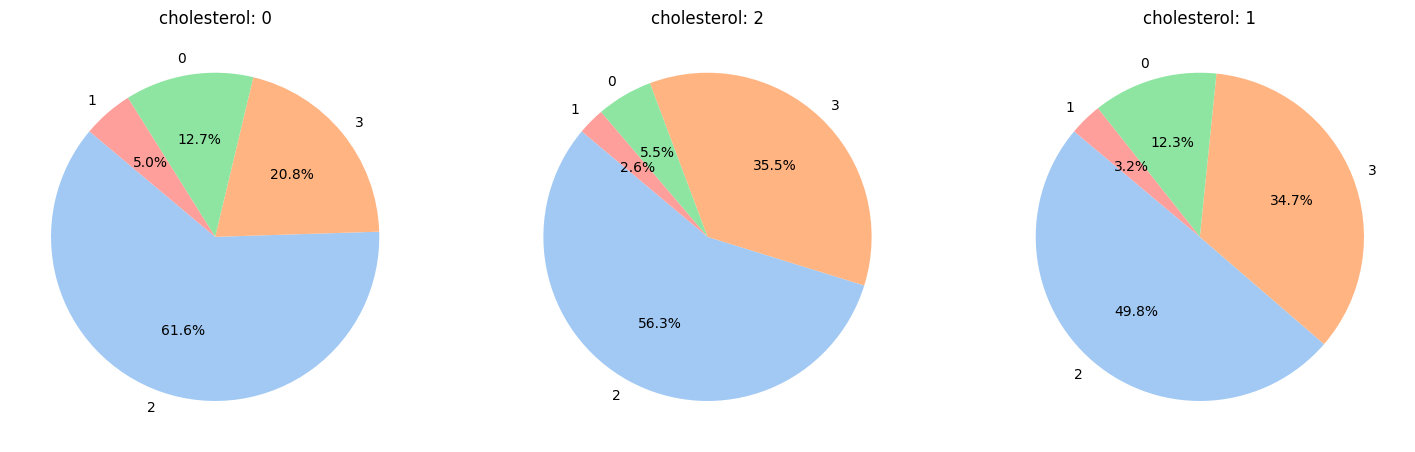

In [ ]:
biCatAnalysis('cholesterol', df_adj)

Legend: chol:0 = Normal, chol:1 = Above Normal, chol:2 = Well Above Normal

From the graphs above, there is some correlation between cholesterol and BP levels.
1. For Normal, the percentage decrease from chol:0 to chol:1 is insignificant at 0.4%. However, the percentage decrease from chol:1 to chol:2 is rather significant at 6.8%. There is a negative correlation between the percentage of Normal and cholesterol. However, they are not linearly related with a large decrease from chol:1 to chol:2. This might suggests that only participants that have severe cholesterol issues will have BP issues.
2. For Elevated, the percentage decreases from chol:0 to chol:1 and chol:1 to chol:2 are more similar to each other. There is a negative correlation between the percentage of Elevated and cholesterol. However, the difference in how much they decrease might suggest that cholesterol and BP are not linearly related.
3. For Stage 1 Hypertension, there is no clear correlation between its percentage and cholesterol.
4. For stage 2 Hypertension, the percentage increase from chol:0 to chol:1 is rather significant at 13.9%. However, the percentage increase from chol:1 to chol:2 is 0.8%. There is a positive correlation the percentage of Stage 2 Hypertension and cholesterol.However, the difference in how much they increase might suggest that cholesterol and BP are not linearly related. In fact, it seems to be the opposite of what is seen in Normal and Elevated.

Hence, this shows that the distribution of BP levels is correlated with cholesterol but they are not linearly related. It is likely that as cholesterol increases, BP gets exponentially worse, resulting in a ore significant increase in pecentage of Stage 2 Hypertension.

In [ ]:
calculateProb('cholesterol', df_adj)

,cholesterol,bp_category,probability
0,0,0,0.126562
1,0,1,0.049666
2,0,2,0.616140
3,0,3,0.207632
4,1,0,0.122856
5,1,1,0.032154
6,1,2,0.497722
7,1,3,0.347267
8,2,0,0.055305
9,2,1,0.026488


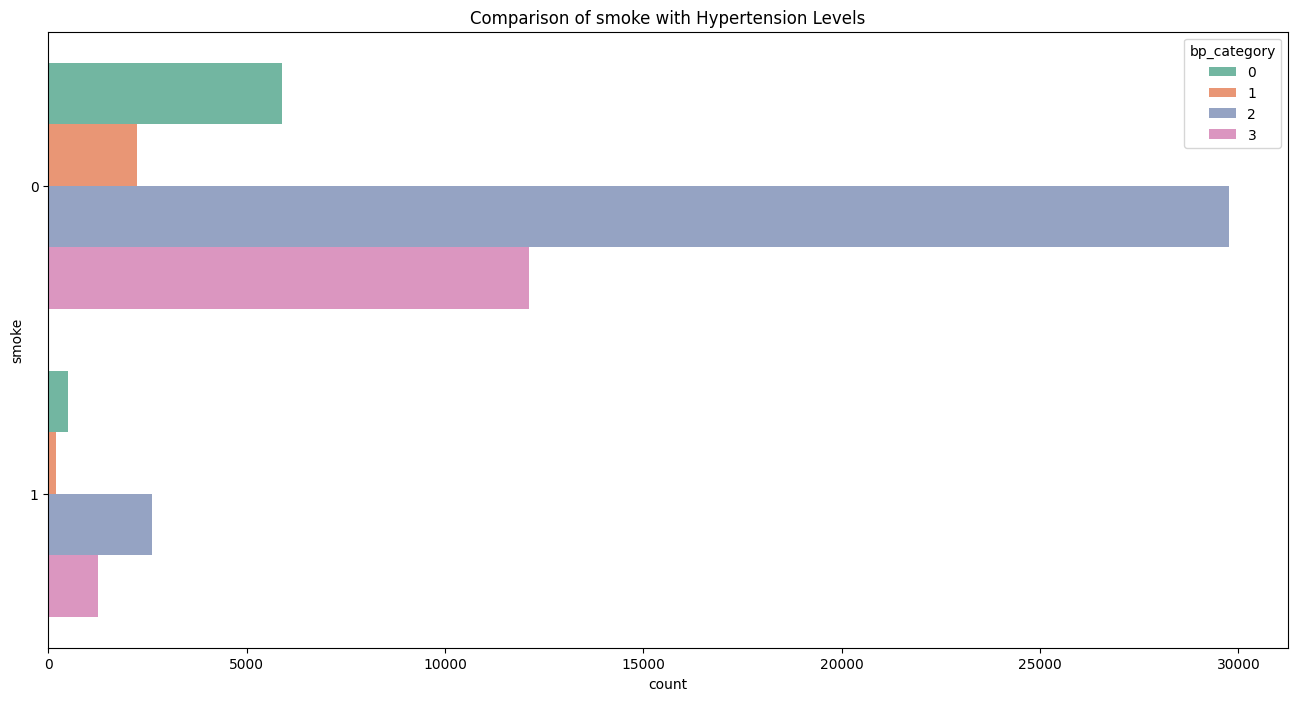

In [22]:
prebiCatAnalysis('smoke', df_adj)

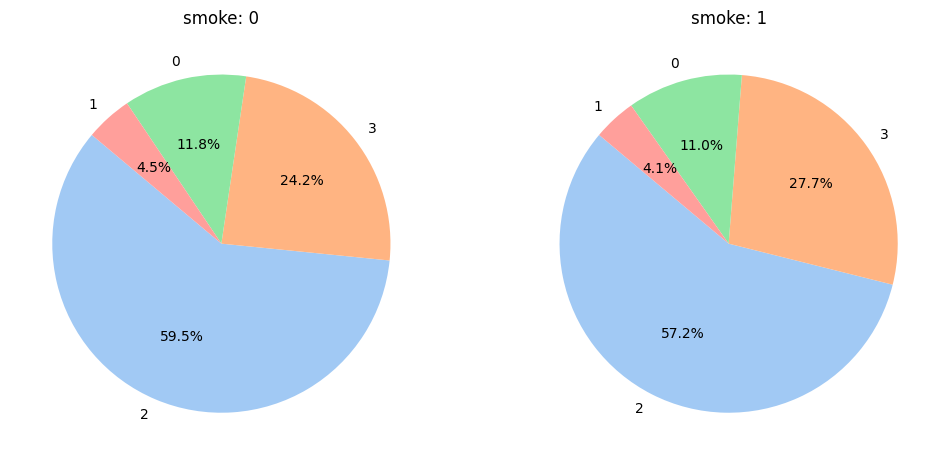

In [ ]:
biCatAnalysis('smoke', df_adj)

Legend: smoke:0 = non-smoker, smoke:1 = smoker

From the graph above, here are some of the conclusions:
1. There is a slight correlation between smoke and Normal, Elevated and Stage 1 Hypertension as the population for them is higher for non-smokers than for smokers.
2. There is a slight correlation between smoke and Stage 2 Hypertension as as the population is lower for non-smokers than for smokers.

This could mean that smoking only starts affecting a person's BP when they are already having BP issues, since the only positive correlation is with Stage 2 Hypertension.

In [ ]:
calculateProb('smoke', df_adj)

,smoke,bp_category,probability
0,0,0,0.117706
1,0,1,0.044655
2,0,2,0.595229
3,0,3,0.242411
4,1,0,0.110310
5,1,1,0.041066
6,1,2,0.572084
7,1,3,0.276540


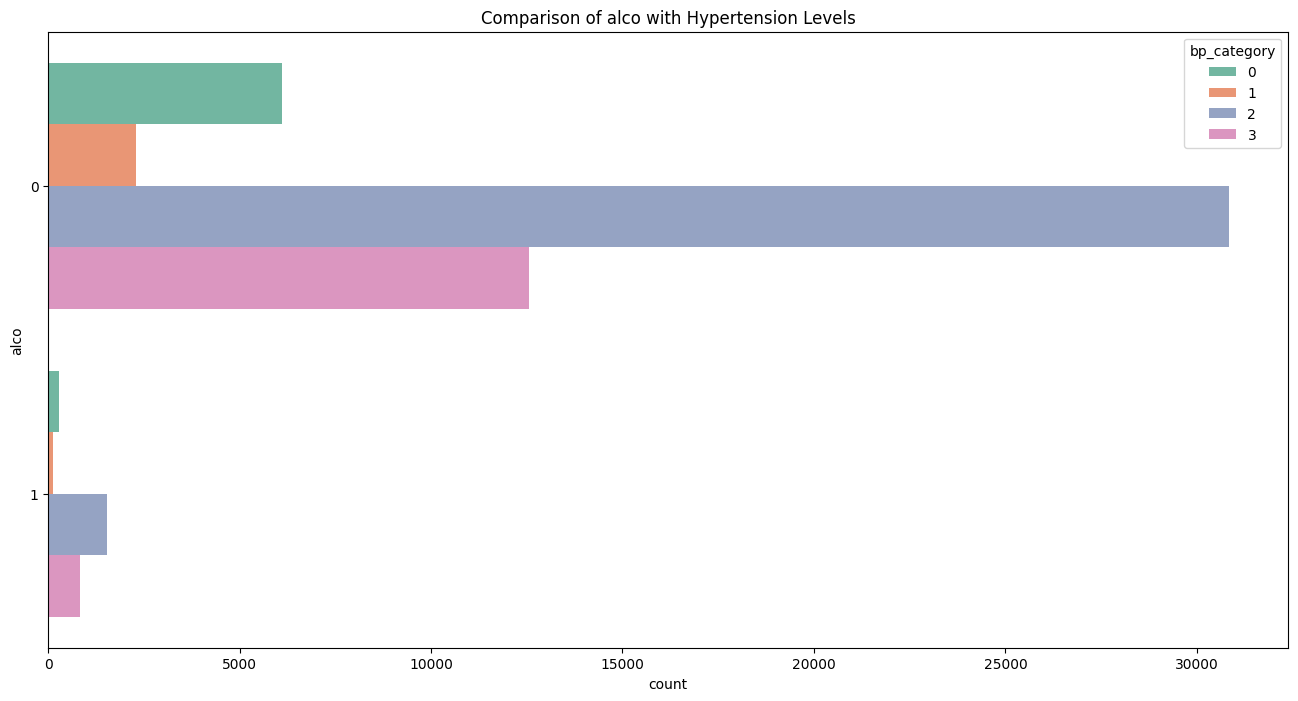

In [23]:
prebiCatAnalysis('alco', df_adj)

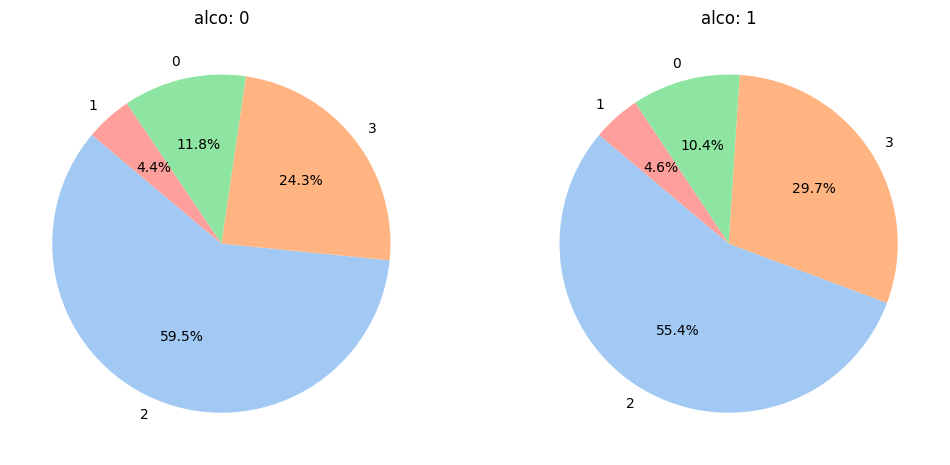

In [ ]:
biCatAnalysis('alco', df_adj)

Legend: alco:0 = non-alcoholic, alco:1 = alcoholic

From the graph above, here are some of the conclusions:
1. There is a neglible difference in the population change for Elevated (0.2%). Hence, there is no correlation between Elavted BP and alcohol.
2. There is a slight negative correlation between smoke and Normal and Stage 1 Hypertension as the population for both is higher for non-alcoholics than for alcoholics.
2. There is a slight positive correlation between smoke and Stage 2 Hypertension as as the population is lower for non-alcoholics than for alcoholics.

This could mean that heavy alcohol consumption only starts affecting a person's BP when they are already having BP issues, since the only positive correlation is with Stage 2 Hypertension.

In [ ]:
calculateProb('alco', df_adj)

,alco,bp_category,probability
0,0,0,0.117812
1,0,1,0.044283
2,0,2,0.595390
3,0,3,0.242515
4,1,0,0.103560
5,1,1,0.045667
6,1,2,0.554117
7,1,3,0.296656


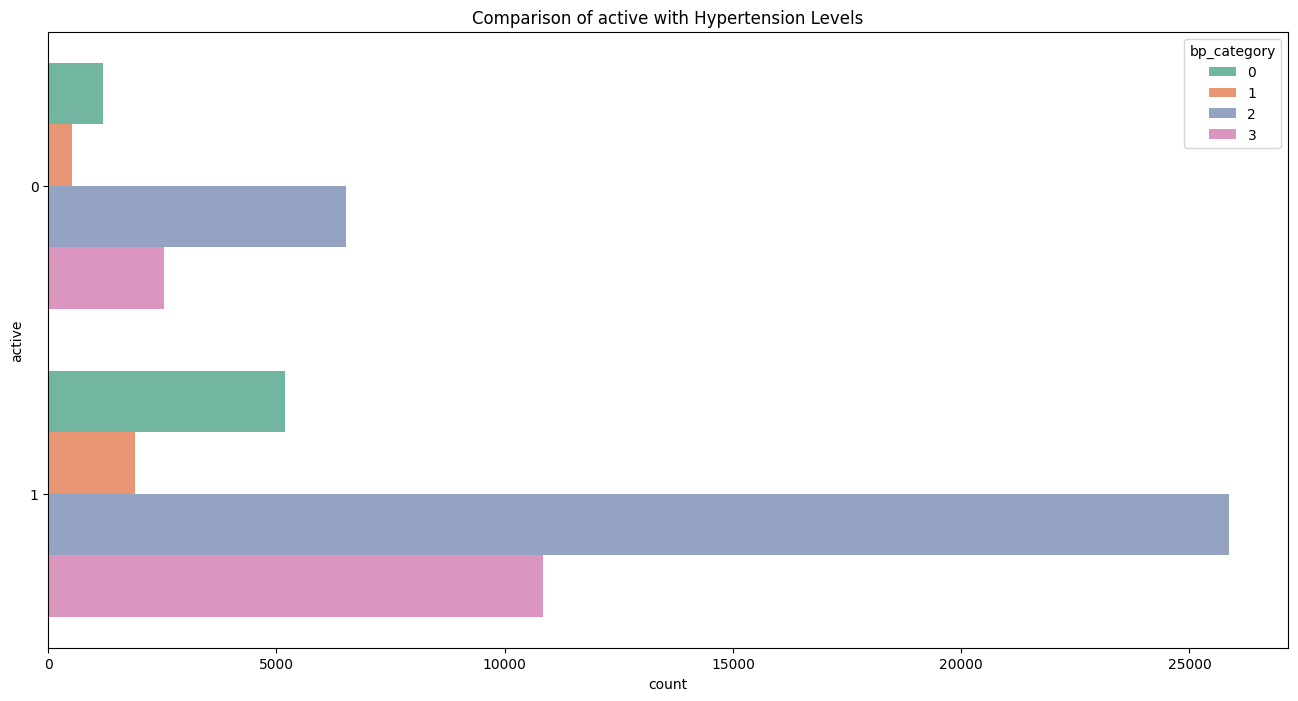

In [24]:
prebiCatAnalysis('active', df_adj)

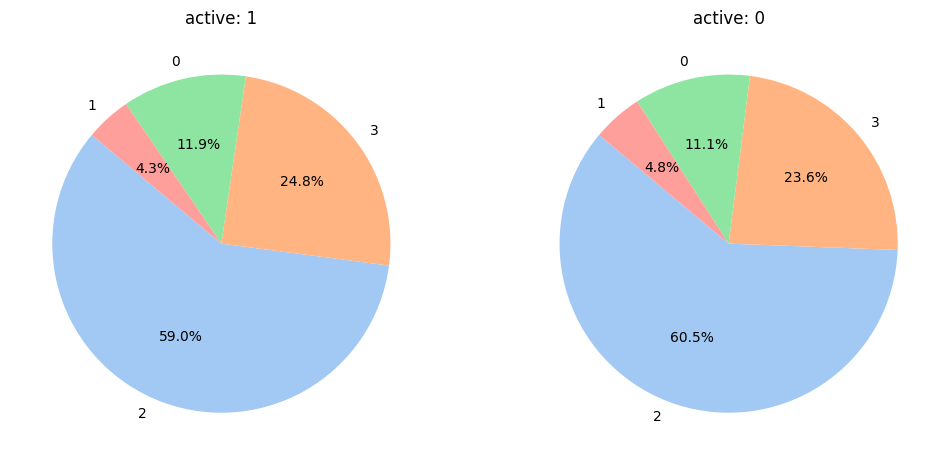

In [ ]:
biCatAnalysis('active', df_adj)

Legend: active:0 = non-active, active:1 = active

From the graph above, here are some of the conclusions:
1. There is no correlation between active and Normal and Elevated. This is shown as the difference for both is negligible (0.8% and 0.5% respectively).
2. There is a very slight positive correlation between active and Stage 1 Hypertension as as the population is higher for non-active than for active.
3. There is a very slight negative correlation between active and Stage 2 Hypertension as as the population is lower for non-active than for active.

This could mean that the "active-ness" of a partipant's lifestyle is not strongly correlated with that of their BP level. At most, a claim can be made that it affects those with Stage 1 Hypertension (positive) and Stage 2 Hypertension (negative). However, this might also call into question what "active-ness" means in this dataset as only so much activity can be expected of those in this age range. Hence, active might not be the best preductor for BP.

In [ ]:
calculateProb('active', df_adj)

,active,bp_category,probability
0,0,0,0.111183
1,0,1,0.047836
2,0,2,0.605146
3,0,3,0.235835
4,1,0,0.118536
5,1,1,0.043498
6,1,2,0.590374
7,1,3,0.247592


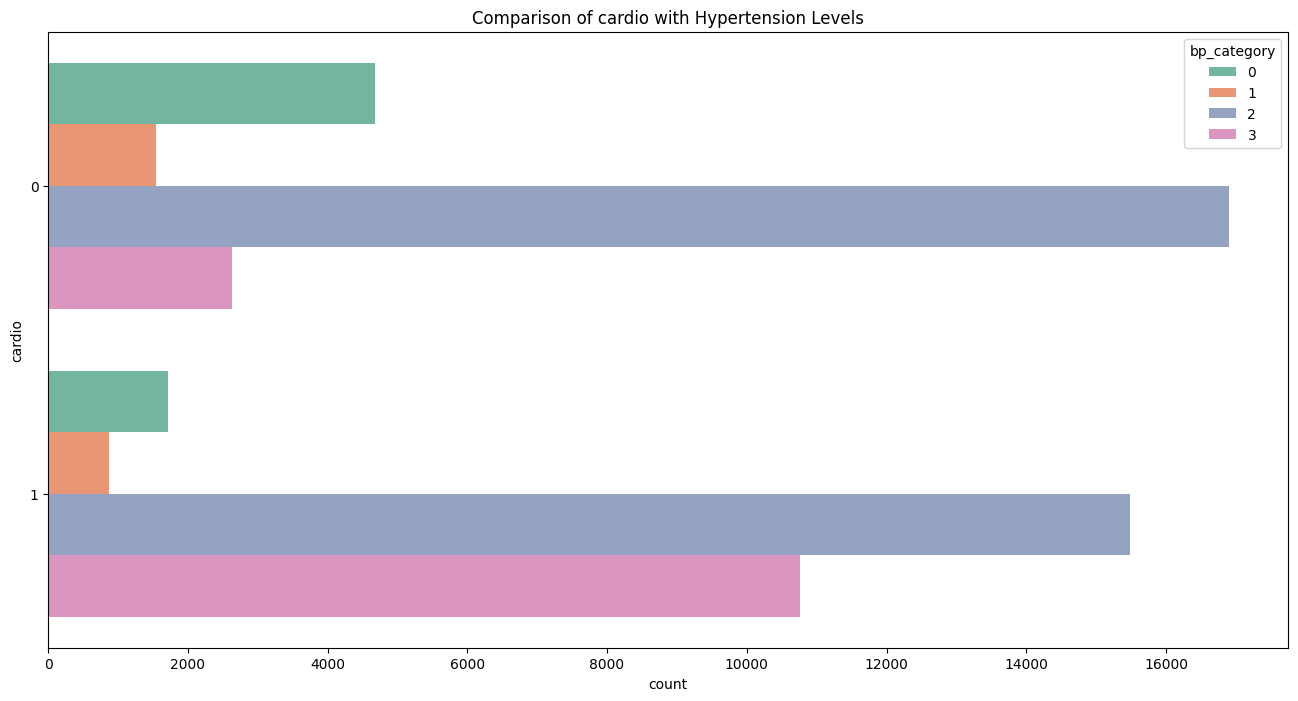

In [34]:
prebiCatAnalysis('cardio', df_adj)

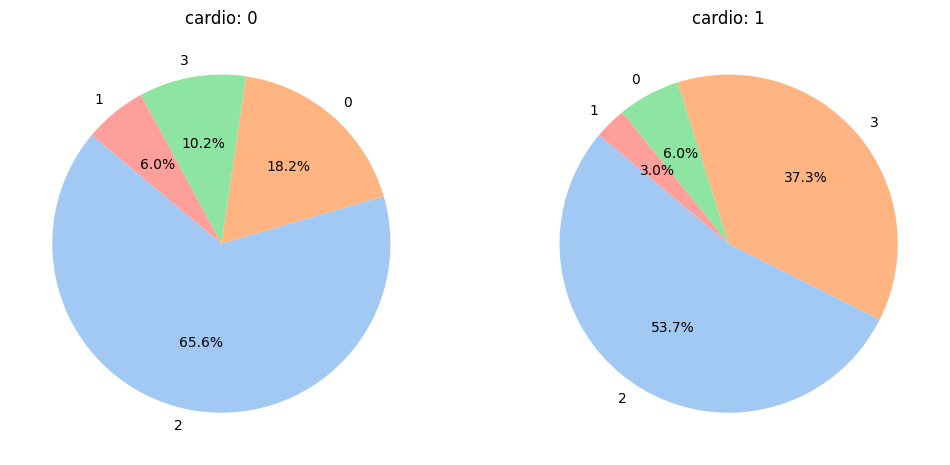

In [ ]:
biCatAnalysis('cardio', df_adj)

Legend: cardio:0 = no CVD, cardio:1 = has CVD
As shown in the graph above, here are some of the conclusions:
1. There is a strong negative correlation between the presence of CVD and the population of Normal, Elevated and Stage 1 Hypertension. There is a significant decrease in the percentage of Normal, Elevated and Stage 1 Hypertension for partipants with CVD than those without CVD. This suggests that people without CVD also do not have severe BP issues.
2. There is a strong positive correlation between the presence of CVD and the population of Stage 2 Hypertension. The population of Tyoe 2 Hypertension increases significantly from those without CVD to those with CVD. This suggests that if a person has Stage 2 Hypertension, they likely to also have CVD. This makes sense as "high blood pressure (hypertension) is one of the most important risk factors for CVD" according to the NHS.

https://www.nhs.uk/conditions/cardiovascular-disease/#:~:text=High%20blood%20pressure%20(hypertension)%20is,more%20about%20high%20blood%20pressure.

In [20]:
calculateProb('cardio', df_adj)

,cardio,bp_category,probability
0,0,0,0.181511
1,0,1,0.059947
2,0,2,0.656313
3,0,3,0.102229
4,1,0,0.059525
5,1,1,0.030422
6,1,2,0.536978
7,1,3,0.373075


## Complex Analysis between Categorical Aand Numerical Variables

In [ ]:
def complexCatAndNum(strNum, strCat, data):
    f = plt.figure(figsize=(20, 8))
    sb.catplot(x=strNum, y='bp_category', row=strCat, data=data, kind='box', aspect=4, orient='h')

<Figure size 2000x800 with 0 Axes>

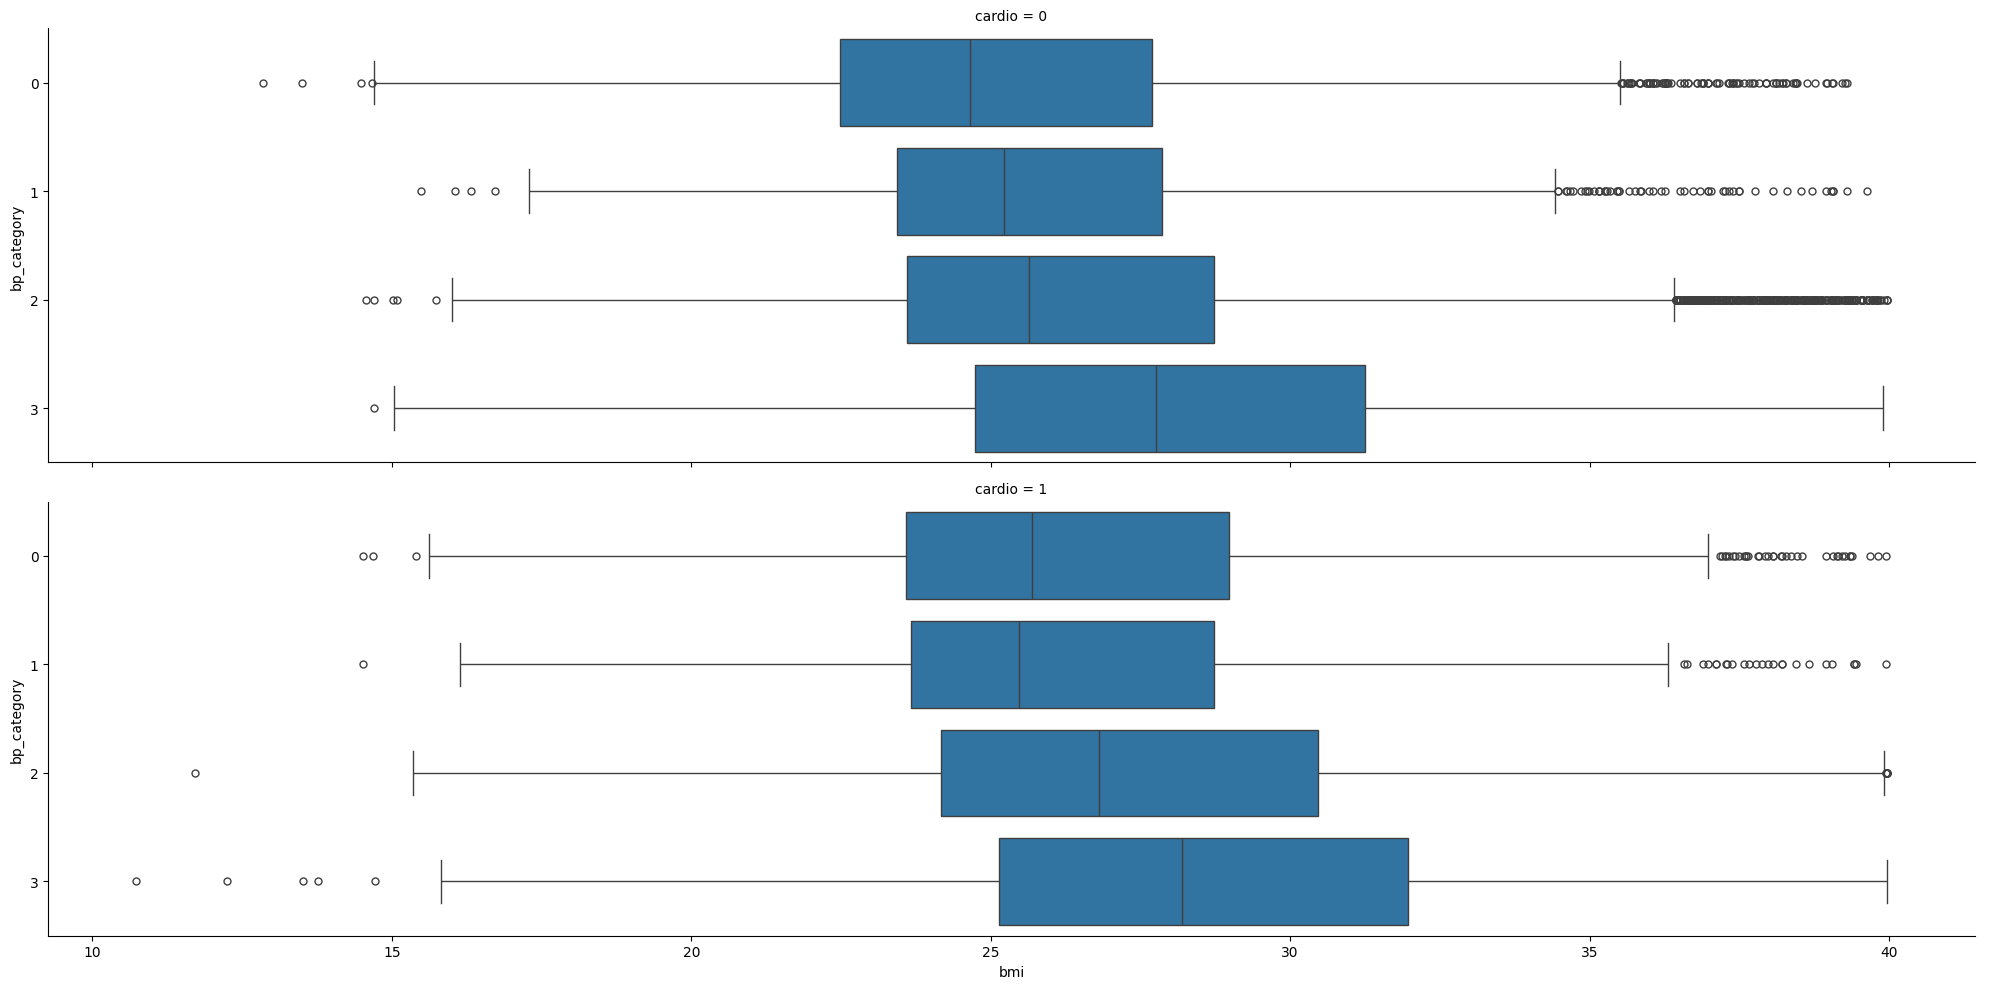

In [ ]:
complexCatAndNum('bmi', 'cardio', df_adj)

As shown in the graphs above, here are some of the conclusions:
1. Across the 2 cardio levels, there exists a similar pattern for the BMIs of the participants with the 4 BP levels. The median for Normal and Elevated have the lowest BMIs, followed by Stage 1 Hypertension and then Stage 2 Hypertension. This reinforces the correlation between BP and BMI, where participants with lower BPs, also have lower BMIs.
2. For Normal, Stage 1 Hypertension and Stage 2 Hypertension, there is a clear correlation between BMI and cardio, where there exists a trend where participants with CVD, also have higher BMI. This perhaps suggests that Normal, Stage 1 Hypertension and Stage 2 Hypertension causes the presence of CVD to be more closely correlated with BMI.
3. For no-cardio(0), there is a significant difference between the BMIs of Normal, Extended and Stage 1 Hypertension, and that of Stage 2 Hypertension. This could mean that only severe BP levels have a higher correlation with BMI when CVD is not present.

<Figure size 2000x800 with 0 Axes>

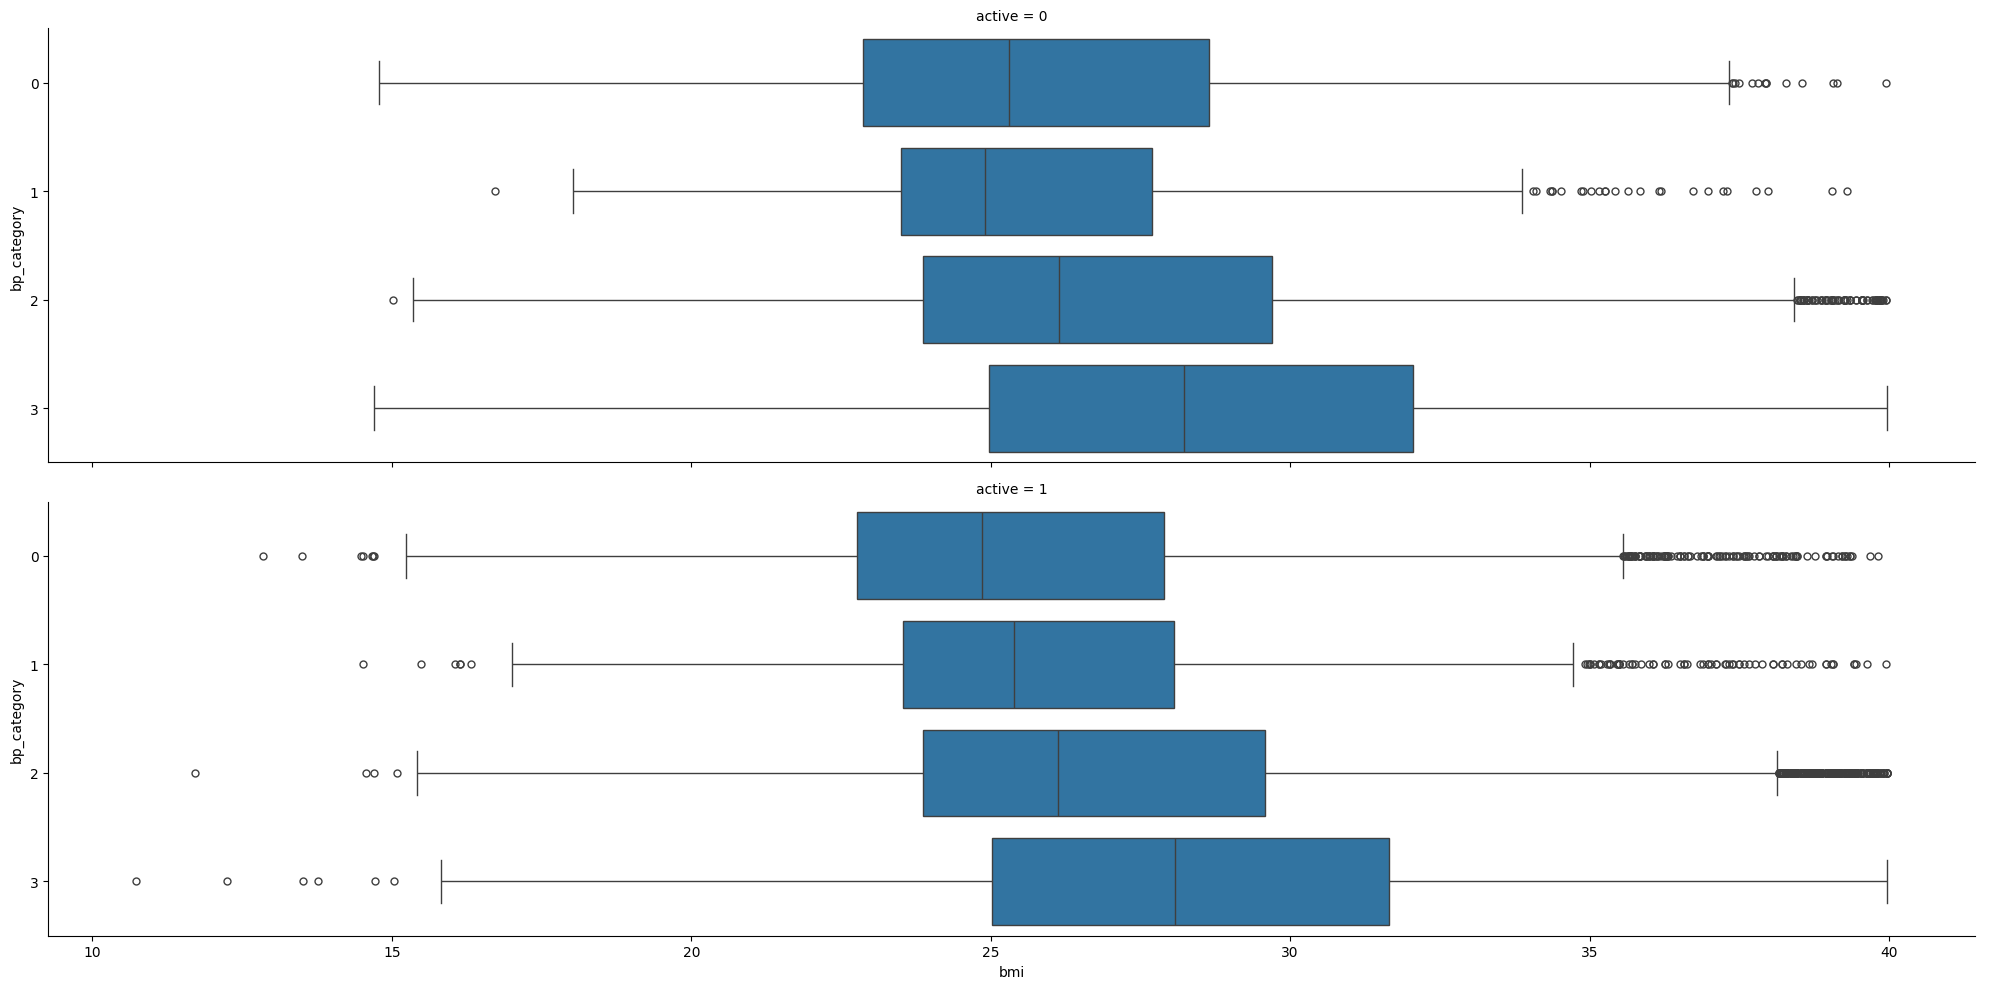

In [ ]:
complexCatAndNum('bmi', 'active', df_adj)

As shown in the graphs above, here are some of the conclusions:
1. In general, the BMI for Stage 2 Hypertension has a significantly higher median than Normal, Elevated and Stage 1 Hypertension, regardless of whether they are active or not. This indicates that "active-ness" might not be a good predictor for BMI.
2. For Stage 1 and Stage 2 Hypertension, there is no clear correlation between active and BMI. The difference between the respective box plots when comparing across active and non-active are negligible.

<Figure size 2000x800 with 0 Axes>

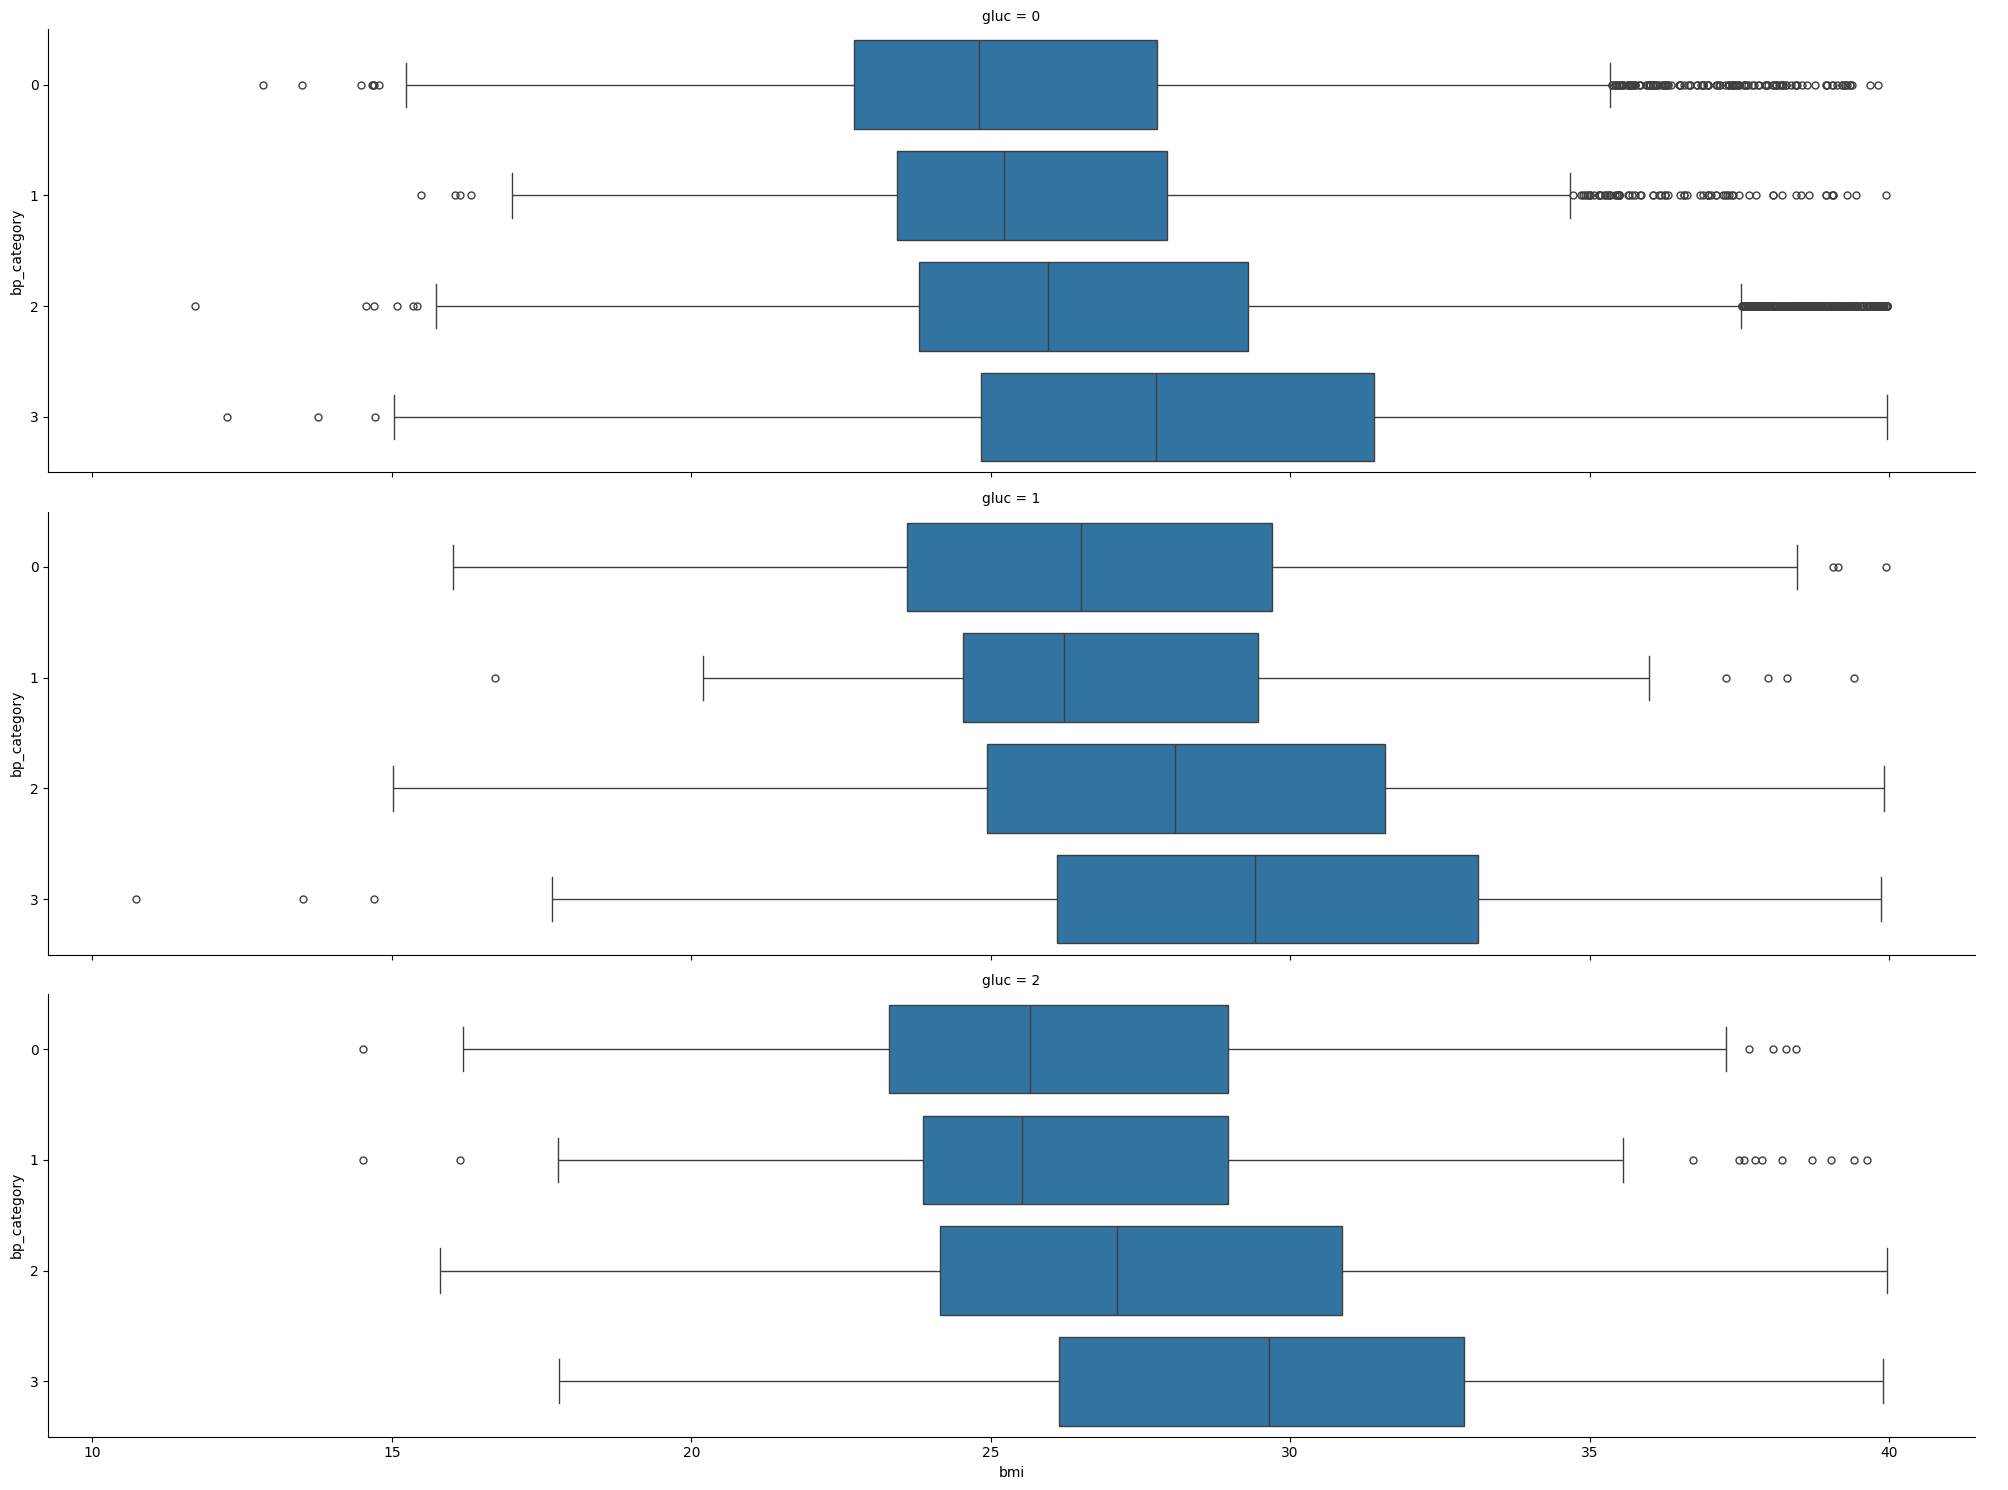

In [ ]:
complexCatAndNum('bmi', 'gluc', df_adj)

As shown in the graphs above, here are some of the conclusions:
1. Across the 3 glucose levels, there exists a similar pattern for the BMIs of the participants with the 4 BP levels. The median for Normal and Elevated have the lowest BMIs, followed by Stage 1 Hypertension and then Stage 2 Hypertension. This reinforces the correlation between BP and BMI, where participants with lower BPs, also have lower BMIs.
2. For Normal, Elevated and Stage 1 Hypertension, there is no clear correlation between the BMI and glucose. Although all 3 exhibit the trend where the BMI of participants with Normal(0) glucose level is lower than those with Above Normal(1) and Well Above Normal(2), the difference between Above Normal and Well Above Normal is insignificant and does not necessarily follow the trend of higher glucose, higher BMI.
3. For Stage 2 Hypertension, there is a clearer correlation between BMI and glucose, where thre exists a trend where participants with higher levels of glucose, also have higher BMI. This perhaps suggests that Stage 2 Hypertension causes glucose to be more closely correlated with BMI.
4. For Well Above Normal glucose level, the difference in BMI between Stage 2 Hypertension and Normal, Elevated and Stage 1 Hypertension is significant. This suggests that higher glucose levels and high BMI might be somewhat reliable as predictors for Stage 2 Hypertension.

<Figure size 2000x800 with 0 Axes>

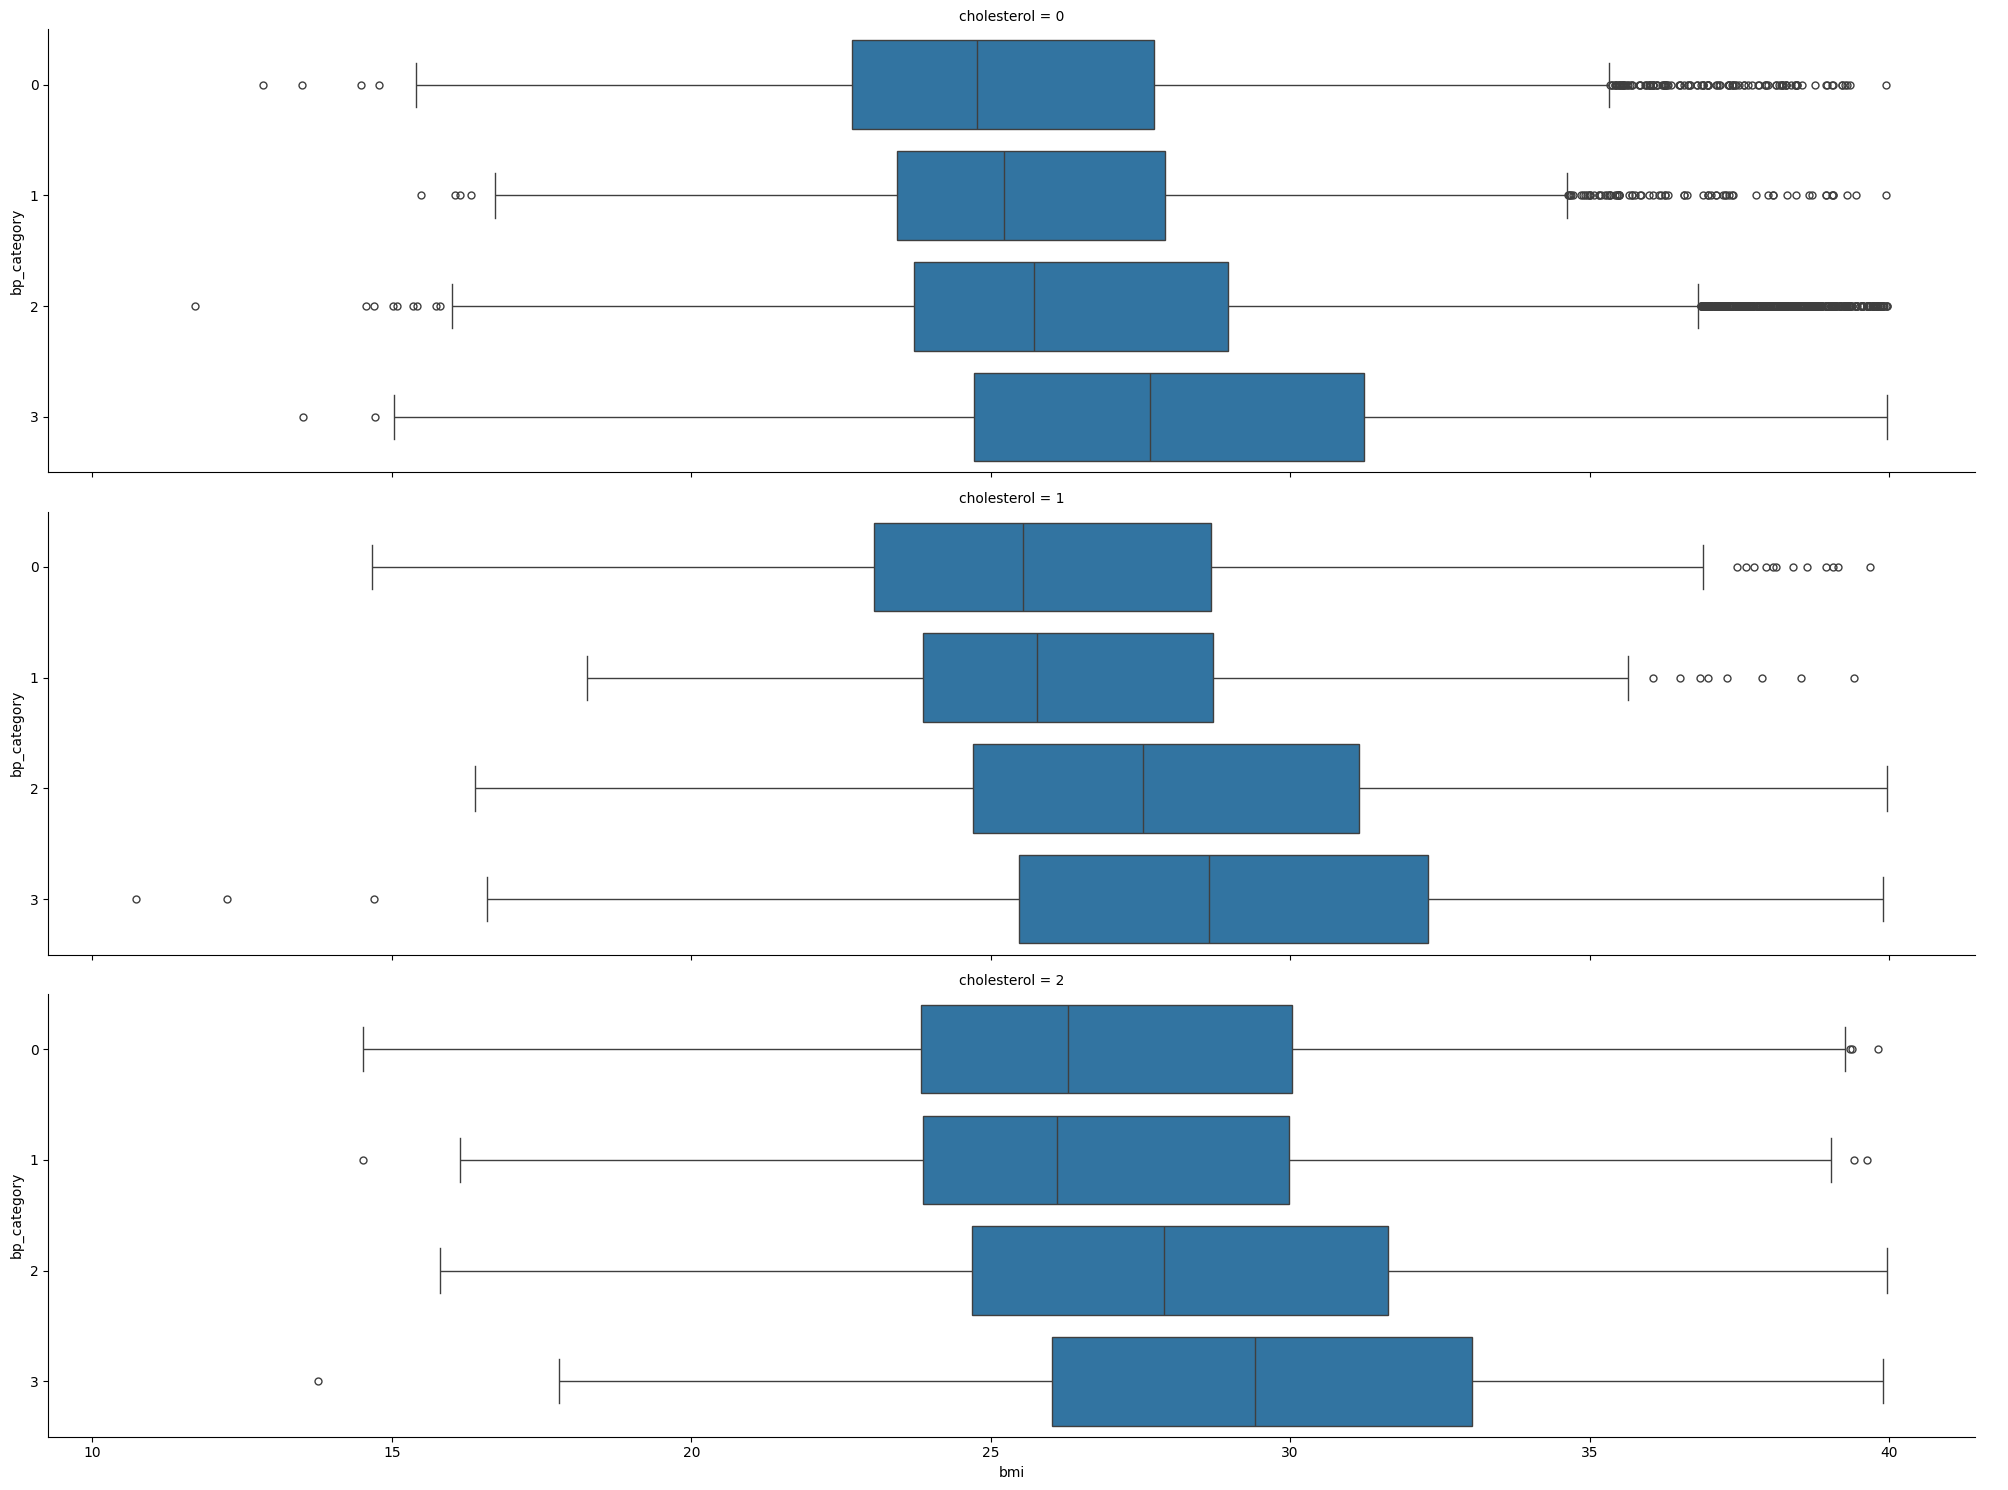

In [ ]:
complexCatAndNum('bmi', 'cholesterol', df_adj)

As shown in the graphs above, here are some of the conclusions:

1. Across the 3 cholesterol levels, there exists a similar pattern for the BMIs of the participants with the 4 BP levels. The median for Normal and Elevated have the lowest BMIs, followed by Stage 1 Hypertension and then Stage 2 Hypertension. This reinforces the correlation between BP and BMI, where participants with lower BPs, also have lower BMIs.
2. For Normal, Stage 1 Hypertension and Stage 2 Hypertension, there is a clear correlation between BMI and cholesterol, where there exists a trend where participants with higher levels of cholesterol, also have higher BMI. This perhaps suggests that Normal, Stage 1 Hypertension and Stage 2 Hypertension causes cholesterol to be more closely correlated with BMI.
3. For Above and Well Above Normal cholesterol level, the difference in BMI between Stage 1 and Stage 2 Hypertension and Normal and Elevated is significant. This suggests that high cholesterol levels and high BMI might be somewhat reliable as predictors for Stage 1 and Stage 2 Hypertension.

### **Conclusion**
From the Exploratory Data Analysis, the dataset shows that blood pressure has some correlation with lifestyle variables – active, alcohol, cardio, and smoke. Negative lifestyle variables – alcohol, cardio, and smoke – have a stronger correlation with blood pressure, which becomes more apparent for participants with Stage 2 Hypertension. Across the alcohol, cardio, and smoke, there Is a noticeable increase in the population percentage for Stage 2 Hypertension when each of the variables are present. Conversely, the positive lifestyle variable – active – does not have a strong correlation with blood pressure, with the distribution of participants with different blood pressure levels being similar, regardless of whether they are active or not.

We then referred to external sources to better understand how these lifestyle variables might affect blood pressure. Although all four variables were found to be related to blood pressure issues (hypertension), we noticed a timeframe associated with how closely related they are with blood pressure. Alcohol, cardio (CVD) and smoke require less time to negatively impact blood pressure, while an active lifestyle needs to be maintained to positively impact blood pressure.

Furthermore, some variables such as active are difficult to measure properly, which could affect the accuracy of the project. For example, a participant who goes for a walk daily and another who runs marathons frequently are both considered as “active”, despite the considerable difference in activity. Hence, while some participants labelled as “active” indeed have a normal blood pressure, others have elevated blood pressure and hypertension because of the lack of definition of what should be considered as “active”.

When comparing blood pressure to health variables – cholesterol, glucose, and BMI - the dataset shows that blood pressure has some correlation with health variables. Among the health variables, cholesterol and BMI have a stronger positive correlation with blood pressure, indicating that they might be caused by the same health conditions. However, there are differences in how cholesterol and BMI are related to blood pressure.
For cholesterol, the difference between chol:0 (Normal) and chol:1 (Above Normal) is significantly larger than that between chol:1 (Above Normal) and chol:2 (Well Above Normal). This means that the relation between cholesterol and blood pressure plateaus as cholesterol increase. For BMI, the increase in blood pressure from Stage 1 Hypertension to Stage 2 Hypertension returns the largest difference in BMI while the rest of the differences are not as significant. This means that the relation between BMI and blood pressure becomes steeper as blood pressure increases.
Conversely, glucose is somewhat correlated with blood pressure. The most significant conclusion that can be made is that the percentage of participants with normal blood pressure decreases as glucose progresses from gluc:0 (Normal) to gluc:2 (Well Above Normal). This suggests that people with healthy blood pressure will also have healthy blood glucose.

We then referred to external sources to better understand how these health variables might be related to blood pressure. All three variables were found to be related to blood pressure issues.
According to Landi (2018), “Body Mass Index is strongly associated with hypertension”. This supports our analysis of the relation between blood pressure and BMI.
At the same time, the external source states that high blood pressure and high cholesterol are the two biggest indicators of potential heart disease. However, there was no concrete evidence that unhealthy levels of cholesterol are related to stages of hypertension. A point to take note of is that the dataset only looks at cholesterol when there is good cholesterol, measured with the amount of high-density lipoprotein (HDL) and bad cholesterol, measured with the amount of low-density lipoprotein (LDL).
For glucose, Filipovsky (1996) concludes in his study that “mean glucose concentrations are higher in hypertensive men at all body mass index levels” but mentions that “relative hyperinsulinemia (too much insulin) is present only in the more corpulent (obese) hypertensives.” This indicates that the results of our analysis is in line with external sources when comparing normal and abnormal blood pressures but raises issues with the relation between blood pressure and glucose across Elevated, Stage Hypertension and Stage 2 Hypertension.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10243231/
https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/expert-answers/blood-pressure/faq-20058254
https://pubmed.ncbi.nlm.nih.gov/20550499/
https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/high-blood-pressure/art-20045206#:~:text=An%20inactive%20%E2%80%94%20also%20called%20sedentary,or%20computer%20may%20be%20helpful.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6316192/
https://my.clevelandclinic.org/health/articles/11918-cholesterol-high-cholesterol-diseases
https://pubmed.ncbi.nlm.nih.gov/8728301/